# Import usefull packages

In [1271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import utils

from pandas.api.types import is_numeric_dtype
from scipy.stats import ttest_ind
from matplotlib import pyplot

from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics


from sklearn.tree import export_graphviz
#import pydot #not preinstalled. see...
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve , classification_report
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
#imbalanced data set
#import imblearn# not pre installed in acanconda
#from imblearn import under_sampling
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import SMOTE, RandomOverSampler

#measure time of the algorithme
#import time

# Load the data

In [1272]:
#learning data set
df_lrn=pd.read_csv('learn_dataset.csv', sep=',')
df_lrn_job=pd.read_csv('learn_dataset_job.csv', sep=',')
df_lrn_contract=pd.read_csv('learn_dataset_EMP_CONTRACT.csv', sep=',')
df_lrn_sport=pd.read_csv('learn_dataset_sport.csv', sep=',')

#test data set
df_test=pd.read_csv('test_dataset.csv', sep=',')
df_test_job=pd.read_csv('test_dataset_job.csv', sep=',')
df_test_contract=pd.read_csv('test_dataset_EMP_CONTRACT.csv', sep=',')
df_test_sport=pd.read_csv('test_dataset_sport.csv', sep=',')

#geographical dataset
df_city_adm=pd.read_csv('city_adm.csv', sep=',')
df_city_loc=pd.read_csv('city_loc.csv', sep=',')
df_city_pop=pd.read_csv('city_pop.csv', sep=',')
df_dep=pd.read_csv('departments.csv', sep=',')
df_reg=pd.read_csv('regions.csv', sep=',')

#code data set
df_act=pd.read_csv('code_ACT.csv', sep=',')
df_sector=pd.read_csv('code_ACTIVITY_SECTOR.csv', sep=',')
df_EMP_contract=pd.read_csv('code_EMP_CONTRACT.csv', sep=',')
df_empl_count=pd.read_csv('code_Employee_count.csv', sep=',')
df_empl_cat=pd.read_csv('code_Employer_category.csv', sep=',')
df_degree=pd.read_csv('code_highest_degree.csv', sep=',')
df_household=pd.read_csv('code_Household.csv', sep=',')
df_job=pd.read_csv('code_JOB_CATEGORY.csv', sep=',')
df_csp=pd.read_csv('code_occupation_42.csv', sep=',')
df_sport=pd.read_csv('code_sports.csv', sep=',')
df_contract=pd.read_csv('code_type_of_contract.csv', sep=',')
df_work_cond=pd.read_csv('code_Work_condition.csv', sep=',')
df_work_des=pd.read_csv('code_Work_description.csv', sep=',')

#additional data set

df_csp_mapping=pd.read_csv('mapping csp.csv', sep=';')

In [1273]:
df_lrn_job.head()

,Unique_id,Wage,Work_condition,WORKING_HOURS,JOB_CATEGORY,ACTIVITY_SECTOR,Employee_count,type_of_contract,job_dep,Employer_category,Work_description
0,1,15575,C,1906.0,O,IZ,tr_1,CDI,74,ct_9,561b
1,18,20560,P,985.0,O,HZ,tr_6,CDI,69,ct_9,333c
2,22,41947,C,2028.0,O,IZ,tr_1,CDI,01,ct_9,377a
3,23,14312,C,2023.0,O,GZ,tr_1,CDI,01,ct_9,682a
4,25,17423,C,1839.0,O,GZ,tr_1,CDI,69,ct_9,554a


In [1274]:
df_test.head()

,Unique_id,occupation_42,highest_degree,age_2020,Household,insee,SEX,IS_STUDENT,Act
0,5,csp_7_7,DIPL1,94,FT4_1,01004,Female,False,at2|1
1,6,csp_2_2,DIPL1|3,70,FT4_3,01004,Female,False,at1|1
2,8,csp_5_2,DIPL1|3,21,FT3_2,01004,Male,False,at1|1
3,9,csp_5_6,DIPL1|3,19,FT4_3,01004,Male,False,at1|2
4,10,csp_7_4,DIPL1|3,63,FT4_4,01004,Male,False,at2|1


In [1275]:
df_test.count()

Unique_id         49999
occupation_42     49999
highest_degree    49999
age_2020          49999
Household         49999
insee             49999
SEX               49999
IS_STUDENT        49999
Act               49999
dtype: int64

# I. Preprocessing

## 1) Merge the main dataset with the Additional information variables and the geographical data

In [1276]:
# 1st we are going to set the key as the index in all four dataframes, for the learning, and the teasting set
df_lrn.set_index('Unique_id', inplace=True)
df_lrn_job.set_index('Unique_id', inplace=True)
df_lrn_sport.set_index('Unique_id', inplace=True)
df_lrn_contract.set_index('Unique_id', inplace=True)

df_test.set_index('Unique_id', inplace=True)
df_test_job.set_index('Unique_id', inplace=True)
df_test_sport.set_index('Unique_id', inplace=True)
df_test_contract.set_index('Unique_id', inplace=True)

In [1277]:
# join the four df based on key index for the learning set
df_lrn_info = df_lrn.join(df_lrn_job)
df_lrn_info = df_lrn_info.join(df_lrn_sport)
df_lrn_info = df_lrn_info.join(df_lrn_contract)

# join the four df based on key index for the testing set
df_test_info = df_test.join(df_test_job)
df_test_info = df_test_info.join(df_test_sport)
df_test_info = df_test_info.join(df_test_contract)

In [1278]:
df_lrn_info.head()

,occupation_42,highest_degree,age_2020,Household,insee,SEX,IS_STUDENT,Act,target,Wage,...,WORKING_HOURS,JOB_CATEGORY,ACTIVITY_SECTOR,Employee_count,type_of_contract,job_dep,Employer_category,Work_description,sports,EMP_CONTRACT
Unique_id,,,,,,,,,,,,,,,,,,,,,
1,csp_5_6,DIPL1|2,59,FT4_1,01004,Female,False,at1|1,9.6545,15575.0,...,1906.0,O,IZ,tr_1,CDI,74,ct_9,561b,FEDE-123,ec1_6
2,csp_7_8,DIPL1|3,70,FT4_4,01004,Male,False,at2|1,8.4466,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEDE-404,NaN
3,csp_7_8,DIPL2,78,FT1_1,01004,Male,False,at2|1,6.5772,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,csp_8_4,DIPL1|4,18,FT4_1,01004,Female,True,at2|2,11.2192,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,csp_8_5,DIPL1|2,16,FT4_1,01004,Female,True,at2|5,5.5074,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1279]:
df_temp = pd.merge(df_city_adm, df_city_loc, on='insee', how='outer')
df_city = pd.merge(df_temp, df_city_pop, on='insee', how='outer') 

In [1280]:
df_city.head()

,Nom de la commune,insee,City_type,Dep,X,Y,Lat,Long,INHABITANTS
0,L' Abergement-Clémenciat,01001,Commune simple,01,848637.261367,6.563325e+06,46.153426,4.926114,785
1,L' Abergement-de-Varey,01002,Commune simple,01,887850.413286,6.548383e+06,46.009188,5.428017,241
2,Ambérieu-en-Bugey,01004,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
3,Ambérieux-en-Dombes,01005,Commune simple,01,847992.214687,6.545842e+06,45.996180,4.912273,1658
4,Ambléon,01006,Commune simple,01,901659.775045,6.519969e+06,45.749499,5.594320,115


In [1281]:
# add departements and region data to city data (to get data about the full administrative and geographical structure of France)
df_france = pd.merge(df_city, df_dep, on='Dep', how='outer')
df_france = pd.merge(df_france, df_reg, on='Reg', how='outer')

In [1282]:
df_france.head()

,Nom de la commune,insee,City_type,Dep,X,Y,Lat,Long,INHABITANTS,Nom du département,Reg,Nom de la région
0,L' Abergement-Clémenciat,01001,Commune simple,01,848637.261367,6.563325e+06,46.153426,4.926114,785,Ain,84,Auvergne-Rhône-Alpes
1,L' Abergement-de-Varey,01002,Commune simple,01,887850.413286,6.548383e+06,46.009188,5.428017,241,Ain,84,Auvergne-Rhône-Alpes
2,Ambérieu-en-Bugey,01004,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,Ain,84,Auvergne-Rhône-Alpes
3,Ambérieux-en-Dombes,01005,Commune simple,01,847992.214687,6.545842e+06,45.996180,4.912273,1658,Ain,84,Auvergne-Rhône-Alpes
4,Ambléon,01006,Commune simple,01,901659.775045,6.519969e+06,45.749499,5.594320,115,Ain,84,Auvergne-Rhône-Alpes


In [1283]:
# Quick check of missing values
df_france.isna().sum()

Nom de la commune     0
insee                 0
City_type             0
Dep                   0
X                     0
Y                     0
Lat                   0
Long                  0
INHABITANTS           0
Nom du département    0
Reg                   0
Nom de la région      0
dtype: int64

In [1284]:
# total dataset concatenating the dataframe with additional informations and the dataframe with geographical information
df_total_lrn = pd.merge(df_lrn_info, df_france, on='insee', how='inner')

df_total_test = pd.merge(df_test_info, df_france, on='insee', how='inner')

df_total_lrn_copy=df_total_lrn.copy(deep=True)

In [1285]:
from statistics import median
median_wage=median(df_total_lrn['Wage'])
median_WH=median(df_total_lrn['WORKING_HOURS'])
median_wage1=median(df_total_test['Wage'])
median_WH1=median(df_total_test['WORKING_HOURS'])

## 2) dealing with the missing values

In [1286]:
df_total_test.isna().sum()

occupation_42             0
highest_degree            0
age_2020                  0
Household                 0
insee                     0
SEX                       0
IS_STUDENT                0
Act                       0
Wage                  30192
Work_condition        30192
WORKING_HOURS         30258
JOB_CATEGORY          30192
ACTIVITY_SECTOR       30192
Employee_count        30192
type_of_contract      30192
job_dep               30192
Employer_category     30192
Work_description      30192
sports                42265
EMP_CONTRACT          25662
Nom de la commune         0
City_type                 0
Dep                       0
X                         0
Y                         0
Lat                       0
Long                      0
INHABITANTS               0
Nom du département        0
Reg                       0
Nom de la région          0
dtype: int64

### a) type of contracts (and probably other variables linked)

In [1287]:
print('The total number of missing values in the "type_of_contract" variable is:',df_total_lrn['type_of_contract'].isna().sum())
print('Proportion of person with a missing contract in our dataset',
      (df_total_lrn['type_of_contract'].isna().sum() / df_total_lrn.shape[0]))

The total number of missing values in the "type_of_contract" variable is: 29860
Proportion of person with a missing contract in our dataset 0.5971880562388753


We have a lot of missing values for this variable. The way we deal with those missing values may have a big impact on the results of our analysis, so this process must be taken with care. 

We can first try to understand what could have caused those indidividuals to have a missing contract in the dataset:
* The individual is active and has a contract but his contract has been missed in the collection stage
* The individual is inactive and hence he has no working contract (retiree, housewife, student etc.)

A first step could be to **try to identify inactive individuals using the "act" variable (which describes the nature of the activity of the individual) and assign them a new category of the "contract" variable: inactive.**
We can then assume that the individuals left with a missing value in "contract" may be people for which the contract has not been properly registered in the collection process stage. Based on the number of observations in that case we can simply remove them of the dataset (if not too many) or try to identify their true contract using other variables (if they are too many).

If none of those techniques enables us to identify clearly the underlying aspect of the missing values, **we can also take those missing values as a category and rename if for instance "inactives or missing contracts or other"**. We could also remove all the observations with a missing value (but it might a bad idea since it would exclude inactives and other category of individuals from our sample).

We also saw thath the EMP_contract variable had a lot of missing value. bUT LESS THAN THE type_of_contract VARIABLE. We can suppose than people with a value in EMP_CONTRACT but no value in the type_of contract variable, are not inactive of unemployed, but that we miss a contract. 
Concerning the lack of EMP_CONTRAT, the missing value correspond probably to the inactive catégorie (wich doesn't correspond to unemployed. that explains probably we have the variable contract with more missing value than the emp_contract)

useful variables in our investigation:
* IS_STUDENT
* act (très utile) inactifs:
    * "at1|2","Chômeurs"
    * "at2|1","Retraités ou préretraités"
    * "at2|2","Elèves, étudiants, stagiaires non rémunéré de 14 ans ou plus"
    * "at2|3","Moins de 14 ans"
    * "at2|4","Femmes ou hommes au foyer"
    * "at2|5","Autres inactifs"
* Occupation_42 (retraités, Autres personnes sans activité professionelle)
* Household ("Famille principale composée d'un couple d’aucun 'actif ayant un emploi' -> chomeur ont il une catégorie dans 'contract' déja?)

In [1288]:
df_total_lrn['EMP'] = np.where(df_total_lrn['EMP_CONTRACT'].isna(), False, True)

print('proportion of individual which are not missing a emp_contract, but who miss a contract:',
     df_total_lrn.loc[df_total_lrn['EMP'],'type_of_contract'].isna().sum() / len(df_total_lrn[df_total_lrn['EMP']]))


df_total_lrn['toc'] = np.where(df_total_lrn['type_of_contract'].isna(), False, True)

print('proportion of individual which HAVE NO missing value in type_of_contract, but who miss a EMP_CONTRACT:',
     df_total_lrn.loc[df_total_lrn['toc'],'EMP_CONTRACT'].isna().sum() / len(df_total_lrn[df_total_lrn['toc']]))



proportion of individual which are not missing a emp_contract, but who miss a contract: 0.1825229320561734
proportion of individual which HAVE NO missing value in type_of_contract, but who miss a EMP_CONTRACT: 0.0


In [1289]:
print('proportion of individuals which are students and have a missing value in "contract":', 
      df_total_lrn.loc[df_total_lrn['IS_STUDENT'],'type_of_contract'].isna().sum() / len(df_total_lrn[df_total_lrn['IS_STUDENT']]))
print('Total amount of missing values of "type_of_contract" which are explained by the individual being a student so inacitve:', 
      df_total_lrn.loc[df_total_lrn['IS_STUDENT'],'type_of_contract'].isna().sum())

proportion of individuals which are students and have a missing value in "contract": 0.8652173913043478
Total amount of missing values of "type_of_contract" which are explained by the individual being a student so inacitve: 5174


The first result is logic since most students are inactive. The second shows that already 1/6 of our missing values are easily explained using the **'IS_STUDENT' variable**. To precie our analysis and seperate inactive students from active students (with a contract) with can use the **"Act" variable**.

In [1290]:
nb_inact_stu_nan_contr = df_total_lrn.loc[(df_total_lrn['IS_STUDENT']) & (df_total_lrn['Act'] == 'at2|2'),'type_of_contract'].isna().sum()
print('number of inactive students with a missing "contract" value:', nb_inact_stu_nan_contr) 
print('proportion of inactive student with a nan value in "type_of_contract":',
      nb_inact_stu_nan_contr / len(df_total_lrn[(df_total_lrn['IS_STUDENT']) & (df_total_lrn['Act'] == 'at2|2')]))

number of inactive students with a missing "contract" value: 4513
proportion of inactive student with a nan value in "type_of_contract": 1.0


In [1291]:
df_total_lrn.loc[(df_total_lrn['IS_STUDENT']) & (df_total_lrn['Act'] == 'at2|2'), 'type_of_contract'] = 'sans contrat'

In [1292]:
print('missing values left in "type_of_contract":', df_total_lrn['type_of_contract'].isna().sum())

missing values left in "type_of_contract": 25347


In [1293]:
#we will see if the household woman and man category explaines the missing values in the type_of_contract variable
nb_hwf_nan_contr = df_total_lrn.loc[df_total_lrn['Act'] == 'at2|4', 'type_of_contract'].isna().sum()
print('nber of housemen or housewifes with a missing value in "contract":', nb_hwf_nan_contr)
print('proportion of housemen or housewifes with a missing value in "type_of_contract":', 
      nb_hwf_nan_contr / len(df_total_lrn[df_total_lrn['Act'] == 'at2|4']))

nber of housemen or housewifes with a missing value in "contract": 1387
proportion of housemen or housewifes with a missing value in "type_of_contract": 1.0


In [1294]:
# assign "unemployed" category to the "contract" variable for people wich are house woman or man
df_total_lrn.loc[df_total_lrn['Act'] == 'at2|4', 'type_of_contract'] = 'sans contrat'

In [1295]:
nb_hwf_nan_contr = df_total_lrn.loc[df_total_lrn['Act'] == 'at2|1', 'type_of_contract'].isna().sum()
print('nber of retired or pre-retired with a missing value in "contract":', nb_hwf_nan_contr)
print('proportion of retired or pre-retired with a missing value in "type_of_contract":', 
      nb_hwf_nan_contr / len(df_total_lrn[df_total_lrn['Act'] == 'at2|1']))


nber of retired or pre-retired with a missing value in "contract": 13582
proportion of retired or pre-retired with a missing value in "type_of_contract": 1.0


In [1296]:
# assign "unemployed" category to the "contract" variable for people wich are retired
df_total_lrn.loc[df_total_lrn['Act'] == 'at2|1', 'type_of_contract'] = 'sans contrat'

In [1297]:
nb_hwf_nan_contr = df_total_lrn.loc[df_total_lrn['Act'] == 'at1|2', 'type_of_contract'].isna().sum()
print('nber of unemployed with a missing value in "contract":', nb_hwf_nan_contr)
print('proportion of unemployed with a missing value in "type_of_contract":', 
      nb_hwf_nan_contr / len(df_total_lrn[df_total_lrn['Act'] == 'at1|2']))

nber of unemployed with a missing value in "contract": 3668
proportion of unemployed with a missing value in "type_of_contract": 1.0


In [1298]:
nb_hwf_nan_contr = df_total_lrn.loc[df_total_lrn['Act'] == 'at2|5', 'type_of_contract'].isna().sum()
print('nber of other inactive with a missing value in "contract":', nb_hwf_nan_contr)
print('proportion of other inactive with a missing value in "type_of_contract":', 
      nb_hwf_nan_contr / len(df_total_lrn[df_total_lrn['Act'] == 'at2|5']))

nber of other inactive with a missing value in "contract": 2142
proportion of other inactive with a missing value in "type_of_contract": 1.0


In [1299]:
# assign "unemployed" category to the "contract" variable for people wich are unemployed
df_total_lrn.loc[df_total_lrn['Act'] == 'at1|2', 'type_of_contract'] = 'sans contrat'
# assign "inactive" category to the "contract" variable for the last inactive people of the sample
df_total_lrn.loc[df_total_lrn['Act'] == 'at2|5', 'type_of_contract'] = 'sans contrat'

In [1300]:
print('missing values left in "type_of_contract":', df_total_lrn['type_of_contract'].isna().sum())

missing values left in "type_of_contract": 4568


In [1301]:
print('missing values left in "type_of_contract":', df_total_lrn['type_of_contract'].isna().sum())

missing values left in "type_of_contract": 4568


In [1302]:
nb_hwf_nan_contr = df_total_lrn.loc[df_total_lrn['Act'] == 'at2|2', 'type_of_contract'].isna().sum()
print('nber of student with a missing value in "contract":', nb_hwf_nan_contr)

nber of student with a missing value in "contract": 71


In [1303]:
df_act.head(8)

,Code,Libellé
0,at1|1,"Actifs ayant un emploi, y compris sous apprent..."
1,at1|2,Chômeurs
2,at2|1,Retraités ou préretraités
3,at2|2,"Elèves, étudiants, stagiaires non rémunéré de ..."
4,at2|3,Moins de 14 ans
5,at2|4,Femmes ou hommes au foyer
6,at2|5,Autres inactifs


In [1304]:
df_total_lrn.loc[(df_total_lrn['Act'] == 'at2|2')&(df_total_lrn['type_of_contract'].isna()), 'type_of_contract'] = 'sans contrat'

In [1305]:
print('missing values left in "type_of_contract":', df_total_lrn['type_of_contract'].isna().sum())

missing values left in "type_of_contract": 4497


In [1306]:
nb_hwf_nan_contr = df_total_lrn.loc[df_total_lrn['Act'] == 'at1|1', 'type_of_contract'].isna().sum()
print('nber of activ with a missing value in "contract":', nb_hwf_nan_contr)

nber of activ with a missing value in "contract": 4497


In [1307]:
#First: we verify that all of the people who miss those several variable are the same

In [1308]:
df_total_lrn['ecat'] = np.where(df_total_lrn['Employer_category'].isna(), False, True)
df_total_lrn['wd'] = np.where(df_total_lrn['Work_description'].isna(), False, True)
df_total_lrn['ecount'] = np.where(df_total_lrn['Employee_count'].isna(), False, True)
df_total_lrn['as'] = np.where(df_total_lrn['ACTIVITY_SECTOR'].isna(), False, True)
df_total_lrn['jb'] = np.where(df_total_lrn['JOB_CATEGORY'].isna(), False, True)
df_total_lrn['wage'] = np.where(df_total_lrn['Wage'].isna(), False, True)
df_total_lrn['wc'] = np.where(df_total_lrn['Work_condition'].isna(), False, True)
df_total_lrn['jd'] = np.where(df_total_lrn['job_dep'].isna(), False, True)
df_total_lrn['wh'] = np.where(df_total_lrn['WORKING_HOURS'].isna(), False, True)

In [1309]:
print('proportion of individuals which have a value in employer category and have a missing value in "contract":', 
      df_total_lrn.loc[df_total_lrn['ecat'],'type_of_contract'].isna().sum() / len(df_total_lrn[df_total_lrn['IS_STUDENT']]))

proportion of individuals which have a value in employer category and have a missing value in "contract": 0.0


In [1310]:
print('proportion of individuals which have a value in work description and have a missing value in "contract":', 
      df_total_lrn.loc[df_total_lrn['wd'],'type_of_contract'].isna().sum() / len(df_total_lrn[df_total_lrn['IS_STUDENT']]))

proportion of individuals which have a value in work description and have a missing value in "contract": 0.0


In [1311]:
print('proportion of individuals which have a value in employee_count and have a missing value in "contract":', 
      df_total_lrn.loc[df_total_lrn['ecount'],'type_of_contract'].isna().sum() / len(df_total_lrn[df_total_lrn['IS_STUDENT']]))

proportion of individuals which have a value in employee_count and have a missing value in "contract": 0.0


In [1312]:
print('proportion of individuals which have a value in activity_sector and have a missing value in "contract":', 
      df_total_lrn.loc[df_total_lrn['as'],'type_of_contract'].isna().sum() / len(df_total_lrn[df_total_lrn['IS_STUDENT']]))

proportion of individuals which have a value in activity_sector and have a missing value in "contract": 0.0


In [1313]:
print('proportion of individuals which have a value in work job_dep and have a missing value in "contract":', 
      df_total_lrn.loc[df_total_lrn['jb'],'type_of_contract'].isna().sum() / len(df_total_lrn[df_total_lrn['IS_STUDENT']]))

proportion of individuals which have a value in work job_dep and have a missing value in "contract": 0.0


In [1314]:
print('proportion of individuals which have a value in work condition and have a missing value in "contract":', 
      df_total_lrn.loc[df_total_lrn['wc'],'type_of_contract'].isna().sum() / len(df_total_lrn[df_total_lrn['IS_STUDENT']]))

proportion of individuals which have a value in work condition and have a missing value in "contract": 0.0


In [1315]:
print('proportion of individuals which have a value in job_dep and have a missing value in "contract":', 
      df_total_lrn.loc[df_total_lrn['jd'],'type_of_contract'].isna().sum() / len(df_total_lrn[df_total_lrn['IS_STUDENT']]))

proportion of individuals which have a value in job_dep and have a missing value in "contract": 0.0


In [1316]:
print('proportion of individuals which have a value in WORKING_HOURS and have a missing value in "contract":', 
      df_total_lrn.loc[df_total_lrn['wh'],'type_of_contract'].isna().sum() / len(df_total_lrn[df_total_lrn['IS_STUDENT']]))

proportion of individuals which have a value in WORKING_HOURS and have a missing value in "contract": 0.0


In [1317]:
#del all of those unusefull variables
g=['ecat','wd','ecount','as','jb','wc','jd','wh']
for i in range(len(g)):
    del(df_total_lrn[g[i]])

In [1318]:
df_total_lrn.loc[(df_total_lrn['Employer_category'].isna())&(df_total_lrn['type_of_contract']!=1|1), 'Employer_category'] = 'whithout employ actually'

In [1319]:
df_total_lrn.loc[(df_total_lrn['Work_description'].isna())&(df_total_lrn['type_of_contract']!=1|1), 'Work_description'] = 'whithout employ actually'
df_total_lrn.loc[(df_total_lrn['Employee_count'].isna())&(df_total_lrn['type_of_contract']!=1|1), 'Employee_count'] = 'whithout employ actually'
df_total_lrn.loc[(df_total_lrn['ACTIVITY_SECTOR'].isna())&(df_total_lrn['type_of_contract']!=1|1), 'ACTIVITY_SECTOR'] = 'whithout employ actually'
df_total_lrn.loc[(df_total_lrn['JOB_CATEGORY'].isna())&(df_total_lrn['type_of_contract']!=1|1), 'JOB_CATEGORY'] = 'whithout employ actually'
df_total_lrn.loc[(df_total_lrn['Wage'].isna())&(df_total_lrn['type_of_contract']!=1|1), 'Wage'] = 0
df_total_lrn.loc[(df_total_lrn['Work_condition'].isna())&(df_total_lrn['type_of_contract']!=1|1), 'Work_condition'] = 'whithout employ actually'
df_total_lrn.loc[(df_total_lrn['job_dep'].isna())&(df_total_lrn['type_of_contract']!=1|1), 'job_dep'] = 'inactive'
df_total_lrn.loc[(df_total_lrn['WORKING_HOURS'].isna())&(df_total_lrn['type_of_contract']!=1|1), 'WORKING_HOURS'] = 0

In [1320]:
#we will do the same for the df_total_test

df_total_test.loc[(df_total_test['type_of_contract'].isna())&(df_total_test['type_of_contract']!=1|1), 'type_of_contract'] = 'sans contrat/chomeur'

df_total_test.loc[(df_total_test['Employer_category'].isna())&(df_total_test['type_of_contract']!=1|1), 'Employer_category'] = 'whithout employ actually'
df_total_test.loc[(df_total_test['Work_description'].isna())&(df_total_test['type_of_contract']!=1|1), 'Work_description'] = 'whithout employ actually'
df_total_test.loc[(df_total_test['Employee_count'].isna())&(df_total_test['type_of_contract']!=1|1), 'Employee_count'] = 'whithout employ actually'
df_total_test.loc[(df_total_test['ACTIVITY_SECTOR'].isna())&(df_total_test['type_of_contract']!=1|1), 'ACTIVITY_SECTOR'] = 'whithout employ actually'
df_total_test.loc[(df_total_test['JOB_CATEGORY'].isna())&(df_total_test['type_of_contract']!=1|1), 'JOB_CATEGORY'] = 'whithout employ actually'
df_total_test.loc[(df_total_test['Wage'].isna())&(df_total_test['type_of_contract']!=1|1), 'Wage'] = 0
df_total_test.loc[(df_total_test['Work_condition'].isna())&(df_total_test['type_of_contract']!=1|1), 'Work_condition'] = 'whithout employ actually'
df_total_test.loc[(df_total_test['job_dep'].isna())&(df_total_test['type_of_contract']!=1|1), 'job_dep'] = 'inactive'
df_total_test.loc[(df_total_lrn['WORKING_HOURS'].isna())&(df_total_test['type_of_contract']!=1|1), 'WORKING_HOURS'] = 0

In [1321]:
pd.to_numeric(df_total_lrn['Wage'])
pd.to_numeric(df_total_lrn["WORKING_HOURS"])
pd.to_numeric(df_total_test['Wage'])
pd.to_numeric(df_total_test["WORKING_HOURS"])

0          NaN
1          NaN
2        320.0
3          NaN
4          NaN
         ...  
49994      NaN
49995      NaN
49996      NaN
49997    907.0
49998      NaN
Name: WORKING_HOURS, Length: 49999, dtype: float64

### b) emp contract

In [1322]:
print('missing values left in "EMP_CONTRACT":', df_total_lrn['EMP_CONTRACT'].isna().sum())

missing values left in "EMP_CONTRACT": 25363


In [1323]:
nb_hwf_nan_contr = df_total_lrn.loc[df_total_lrn['Act'] == 'at1|2', 'EMP_CONTRACT'].isna().sum()
print('nber of unemployed with a missing value in "EMP_CONTRACT":', nb_hwf_nan_contr)
print('proportion of unemployed with a missing value in "emp_contract":', 
      nb_hwf_nan_contr / len(df_total_lrn[df_total_lrn['Act'] == 'at1|2']))

nber of unemployed with a missing value in "EMP_CONTRACT": 3668
proportion of unemployed with a missing value in "emp_contract": 1.0


In [1324]:
nb_hwf_nan_contr = df_total_lrn.loc[df_total_lrn['Act'] == 'at1|1', 'EMP_CONTRACT'].isna().sum()
print('nber of activ with a missing value in "EMP_CONTRACT":', nb_hwf_nan_contr)
print('proportion of activ with a missing value in "emp_contract":', 
      nb_hwf_nan_contr / len(df_total_lrn[df_total_lrn['Act'] == 'at1|1']))

nber of activ with a missing value in "EMP_CONTRACT": 0
proportion of activ with a missing value in "emp_contract": 0.0


In [1325]:
df_total_lrn.loc[df_total_lrn['EMP_CONTRACT'].isna(), 'EMP_CONTRACT'] = 'inactive'

In [1326]:
print('missing values left in "EMP_CONTRACT":', df_total_lrn['EMP_CONTRACT'].isna().sum())

missing values left in "EMP_CONTRACT": 0


In [1327]:
df_total_lrn['EMP_CONTRACT'].head()

0       ec1_6
1    inactive
2    inactive
3    inactive
4    inactive
Name: EMP_CONTRACT, dtype: object

In [1328]:
#we do the same for the test set

df_total_test.loc[df_total_test['EMP_CONTRACT'].isna(), 'EMP_CONTRACT'] = 'inactive'

### c) sport variable

In [1329]:
df_sport.head()

,Code,Categorie,Nom fédération,Nom catégorie
0,FEDE-101,1,Fédération française d'athlétisme,Fédération unisport olympique
1,FEDE-102,1,Fédération française d'aviron,Fédération unisport olympique
2,FEDE-103,1,Fédération française de badminton,Fédération unisport olympique
3,FEDE-105,1,Fédération française de basketball,Fédération unisport olympique
4,FEDE-106,1,Fédération française de boxe,Fédération unisport olympique


In [1330]:
df_sport.count()

Code              97
Categorie         97
Nom fédération    97
Nom catégorie     97
dtype: int64

In [1331]:
df_total_lrn['sports'].value_counts()[:10]

FEDE-111    990
FEDE-123    521
FEDE-402    434
FEDE-132    357
FEDE-109    327
FEDE-604    294
FEDE-242    257
FEDE-105    218
FEDE-245    210
FEDE-101    185
Name: sports, dtype: int64

In [1332]:
print('number of different sport clubs:',len(df_total_lrn['sports'].unique()))

number of different sport clubs: 94


In [1333]:
df_total_lrn.columns

Index(['occupation_42', 'highest_degree', 'age_2020', 'Household', 'insee',
       'SEX', 'IS_STUDENT', 'Act', 'target', 'Wage', 'Work_condition',
       'WORKING_HOURS', 'JOB_CATEGORY', 'ACTIVITY_SECTOR', 'Employee_count',
       'type_of_contract', 'job_dep', 'Employer_category', 'Work_description',
       'sports', 'EMP_CONTRACT', 'Nom de la commune', 'City_type', 'Dep', 'X',
       'Y', 'Lat', 'Long', 'INHABITANTS', 'Nom du département', 'Reg',
       'Nom de la région', 'EMP', 'toc', 'wage'],
      dtype='object')

## 3) Variable encoding

In [1334]:
# create a new dataframes where variables have been reencoded
df_encode = df_total_lrn.copy()

df_encode_test=df_total_test.copy()

### Reencode to get more explicit denomination

In [1335]:
# Act
l_origin_act = list(df_act['Code'].unique())
l_origin_act = [x for x in sorted(l_origin_act)]
l_new_occ = list(df_act['Libellé'].unique())
df_encode['Act'].replace(to_replace=l_origin_act, value=l_new_occ, inplace=True)

df_encode_test['Act'].replace(to_replace=l_origin_act, value=l_new_occ, inplace=True)

In [1336]:
# Household
l_origin_hous = list(df_household['Code'].unique())
l_origin_hous = [x for x in sorted(l_origin_hous)]
l_new_hous = list(df_household['Libellé'].unique())
l_new_hous = [x for x in sorted(l_new_hous)]
df_encode['Household'].replace(to_replace=l_origin_hous, value=l_new_hous, inplace=True)

df_encode_test['Household'].replace(to_replace=l_origin_hous, value=l_new_hous, inplace=True)

In [1337]:
# degree
l_origin_degree = list(df_degree['Code'].unique())
l_origin_degree = [x for x in sorted(l_origin_degree)]
l_new_degree = list(df_degree['Libellé'].unique())
df_encode['highest_degree'].replace(to_replace=l_origin_degree, value=l_new_degree, inplace=True)

df_encode_test['highest_degree'].replace(to_replace=l_origin_degree, value=l_new_degree, inplace=True)

In [1338]:
# occupation_42
l_original_occ = list(df_csp['Code'].unique())
l_new_occ=list(df_csp['Libellé'].unique())
df_encode['occupation_42'].replace(to_replace=l_original_occ, value=l_new_occ, inplace=True)

df_encode_test['occupation_42'].replace(to_replace=l_original_occ, value=l_new_occ, inplace=True)

In [1339]:
#EMP_CONTRACT
l_original_emp=list(df_EMP_contract['Code'].unique())
l_new_EMP_contract=list(df_EMP_contract['Libellé'].unique())
df_encode['EMP_CONTRACT'].replace(to_replace=l_original_emp, value=l_new_EMP_contract, inplace=True)

df_encode_test['EMP_CONTRACT'].replace(to_replace=l_original_emp, value=l_new_EMP_contract, inplace=True)

In [1340]:
#ACTIVITY_SECTOR
l_original_sec=list(df_sector['Code'].unique())
l_new_sec=list(df_sector['Libellé'].unique())
df_encode['ACTIVITY_SECTOR'].replace(to_replace=l_original_sec, value=l_new_sec, inplace=True)

df_encode_test['ACTIVITY_SECTOR'].replace(to_replace=l_original_sec, value=l_new_sec, inplace=True)

In [1341]:
#Employee_count
l_original_empl_count=list(df_empl_count['Code'].unique())
l_new_empl_count=list(df_empl_count['Libellé'].unique())
df_encode['Employee_count'].replace(to_replace=l_original_empl_count, value=l_new_empl_count, inplace=True)

df_encode_test['Employee_count'].replace(to_replace=l_original_empl_count, value=l_new_empl_count, inplace=True)

In [1342]:
#JOB_CATEGORY
l_original_job=list(df_job['Code'].unique())
l_new_job=list(df_job['Libellé'].unique())
df_encode['JOB_CATEGORY'].replace(to_replace=l_original_job, value=l_new_job, inplace=True)

df_encode_test['JOB_CATEGORY'].replace(to_replace=l_original_job, value=l_new_job, inplace=True)

In [1343]:
#type_of_contract
l_original_contract=list(df_contract['Code'].unique())
l_new_contract=list(df_contract['Libellé'].unique())
df_encode['type_of_contract'].replace(to_replace=l_original_contract, value=l_new_contract, inplace=True)

df_encode_test['type_of_contract'].replace(to_replace=l_original_contract, value=l_new_contract, inplace=True)

In [1344]:
#Employer_category
l_original_empl_cat=list(df_empl_cat['Code'].unique())
l_new_empl_cat=list(df_empl_cat['Libellé'].unique())
df_encode['Employer_category'].replace(to_replace=l_original_empl_cat, value=l_new_empl_cat, inplace=True)

df_encode_test['Employer_category'].replace(to_replace=l_original_empl_cat, value=l_new_empl_cat, inplace=True)

In [1345]:
#Work_description
l_original_work_des=list(df_work_des['Code'].unique())
l_new_work_des=list(df_work_des['Libellé'].unique())
df_encode['Work_description'].replace(to_replace=l_original_work_des, value=l_new_work_des, inplace=True)

df_encode_test['Work_description'].replace(to_replace=l_original_work_des, value=l_new_work_des, inplace=True)

In [1346]:
#Work_condition
l_original_work_cond=list(df_work_cond['Code'].unique())
l_new_work_cond=list(df_work_cond['Libellé'].unique())
df_encode['Work_condition'].replace(to_replace=l_original_work_cond, value=l_new_work_cond, inplace=True)

df_encode_test['Work_condition'].replace(to_replace=l_original_work_cond, value=l_new_work_cond, inplace=True)

### Reencoding the sport club

In [1347]:
df_encode['club'] = np.where(df_encode['sports'].isna(), False, True)

df_encode['club'].head(30)

0      True
1      True
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
25     True
26    False
27    False
28    False
29     True
Name: club, dtype: bool

In [1348]:
df_encode_test['club'] = np.where(df_encode_test['sports'].isna(), False, True)

### Reencoding of the arrondissements of the bigest cities

In [1349]:
Paris= ['Paris 1er arrondissement','Paris 15e arrondissement','Paris 18e arrondissement','Paris 19e arrondissement','Paris 20e arrondissement','Paris 16e arrondissement','Paris 17e arrondissement','Paris 18e arrondissement', 'Paris 2e arrondissement', 'Paris 3e arrondissement', 'Paris 4e arrondissement','Paris 5e arrondissement','Paris 6e arrondissement','Paris 7e arrondissement','Paris 8e arrondissement','Paris 9e arrondissement','Paris 10e arrondissement','Paris 11e arrondissement','Paris 12e arrondissement','Paris 13e arrondissement','Paris 14e arrondissement']
Lyon=['Lyon 1er arrondissement','Lyon 2e arrondissement','Lyon 3e arrondissement','Lyon 4e arrondissement','Lyon 5e arrondissement','Lyon 6e arrondissement','Lyon 7e arrondissement','Lyon 8e arrondissement','Lyon 9e arrondissement']
Marseille=['Marseille 1er arrondissement','Marseille 2e arrondissement','Marseille 3e arrondissement','Marseille 4e arrondissement','Marseille 5e arrondissement','Marseille 5e arrondissement','Marseille 6e arrondissement', 'Marseille 7e arrondissment','Marseille 8e arrondissment','Marseille 9e arrondissement','Marseille 10e arrondissement','Marseille 11e arrondissement', 'Marseille 12e arrondissement','Marseille 13e arrondissement','Marseille 14e arrondissement','Marseille 15e arrondissement']


df_encode['Nom de la commune'].replace(to_replace=Paris, value='Paris',
                               inplace=True)
df_encode['Nom de la commune'].replace(to_replace=Lyon, value='Lyon',
                               inplace=True)
df_encode['Nom de la commune'].replace(to_replace=Marseille, value='Marseille',
                               inplace=True)


df_encode_test['Nom de la commune'].replace(to_replace=Paris, value='Paris',
                               inplace=True)
df_encode_test['Nom de la commune'].replace(to_replace=Lyon, value='Lyon',
                               inplace=True)
df_encode_test['Nom de la commune'].replace(to_replace=Marseille, value='Marseille',
                               inplace=True)


In [1350]:
# We replace inhabitants value of arrondissement of paris by the total population of paris
df_encode.loc[df_encode['Nom de la commune'].str.startswith('Paris'), 'INHABITANTS'] = 1925548
df_encode_test.loc[df_encode_test['Nom de la commune'].str.startswith('Paris'), 'INHABITANTS'] = 1925548

In [1351]:
#we do the same for Lyon
df_encode.loc[df_encode['Nom de la commune'].str.startswith('Lyon'), 'INHABITANTS'] = 514707
df_encode_test.loc[df_encode_test['Nom de la commune'].str.startswith('Lyon'), 'INHABITANTS'] = 514707

In [1352]:
#we do the same for Marseille
df_encode.loc[df_encode['Nom de la commune'].str.startswith('Marseille'), 'INHABITANTS'] = 686370
#df_encode.loc[df_encode_test['Nom de la commune'].str.startswith('Marseille'), 'INHABITANTS'] = 686370

### Reencoding Work description

In [1353]:
df_work_des.head()

,Code,Libellé
0,100x,"Agriculteurs et éleveurs, salariés de leur exp..."
1,210x,Artisans salariés de leur entreprise
2,220x,"Commerçants et assimilés, salariés de leur ent..."
3,231a,Chefs de grande entreprise de 500 salariés et ...
4,232a,"Chefs de moyenne entreprise, de 50 à 499 salariés"


In [1354]:
df_work_des.count()

Code       429
Libellé    429
dtype: int64

In [1355]:
print('number of different libéllé for works description:',len(df_total_lrn['Work_description'].unique()))

number of different libéllé for works description: 406


In [1356]:
#we swill keep only the first character.
df_encode['csp_n1'] = df_encode['Work_description'].astype(str).str[0]
df_encode_test['csp_n1'] = df_encode_test['Work_description'].astype(str).str[0]
l_original_csp_n1=list(df_csp_mapping['Code 2017'].unique())

l_new_csp_n1=list(df_csp_mapping['Libellé 2017'].unique())

df_encode['csp_n1'].replace(to_replace=l_original_csp_n1, value=l_new_csp_n1, inplace=True)

df_encode_test['csp_n1'].replace(to_replace=l_original_csp_n1, value=l_new_csp_n1, inplace=True)



## 4) Quick descriptive analysis, and last dealing with missing values, and reencoding

We will create a last data set, by allocating a value to the missing values, in order to see the description of the variables

In [1357]:
d_wmv_toc=df_encode.copy(deep=True)

In [1358]:
d_wmv_toc = d_wmv_toc[d_wmv_toc['type_of_contract'].notna()]
d_wmv_toc = d_wmv_toc[d_wmv_toc['ACTIVITY_SECTOR'].notna()]
d_wmv_toc = d_wmv_toc[d_wmv_toc['JOB_CATEGORY'].notna()]
d_wmv_toc = d_wmv_toc[d_wmv_toc['Work_condition'].notna()]
d_wmv_toc = d_wmv_toc[d_wmv_toc['WORKING_HOURS'].notna()]
d_wmv_toc = d_wmv_toc[d_wmv_toc['Wage'].notna()]
d_wmv_toc = d_wmv_toc[d_wmv_toc['Employee_count'].notna()]
d_wmv_toc = d_wmv_toc[d_wmv_toc['Employer_category'].notna()]
d_wmv_toc = d_wmv_toc[d_wmv_toc['job_dep'].notna()]
d_wmv_toc = d_wmv_toc[d_wmv_toc['Work_description'].notna()]
d_wmv_toc = d_wmv_toc[d_wmv_toc['csp_n1'].notna()]

In [1359]:
outcome= df_encode['target'].mean()
outcome


8.413006177876458

In [1360]:
df_encode['age_2020'].describe()

count    50001.000000
mean        48.940181
std         20.253771
min         15.000000
25%         32.000000
50%         48.000000
75%         64.000000
max        112.000000
Name: age_2020, dtype: float64

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\Hannah\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Hannah\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Hannah\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Hannah\anaconda3\lib\site-

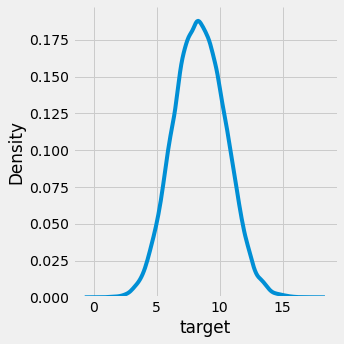

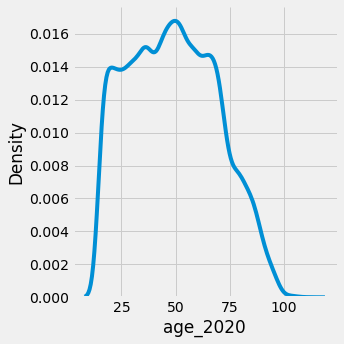

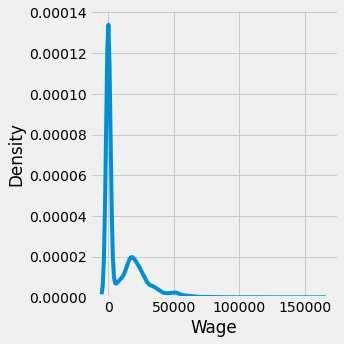

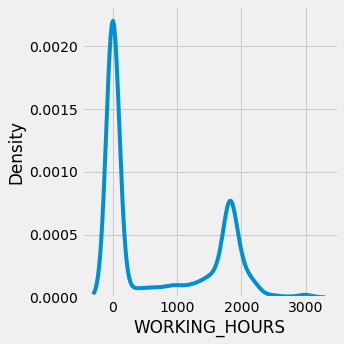

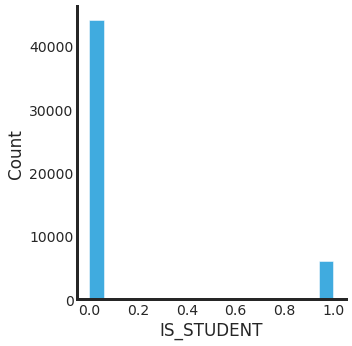

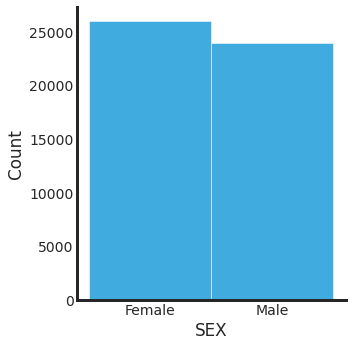

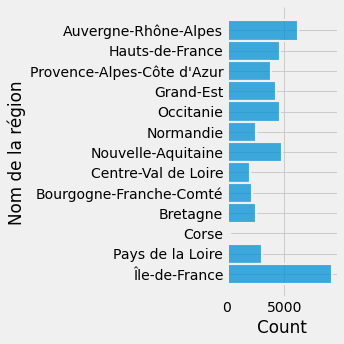

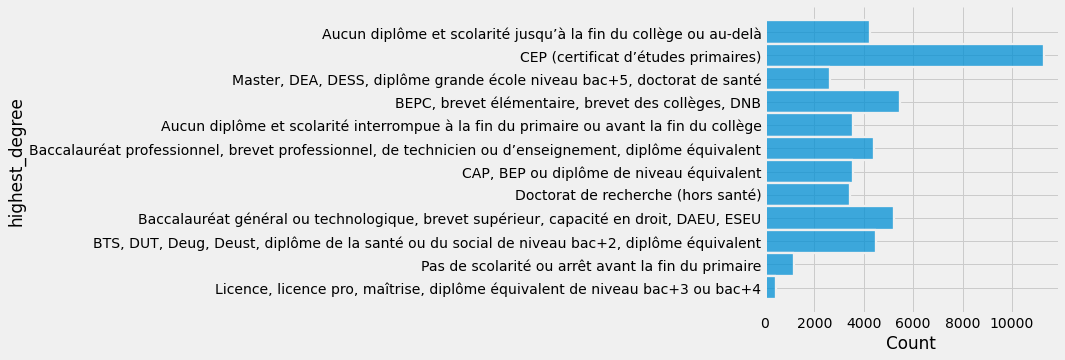

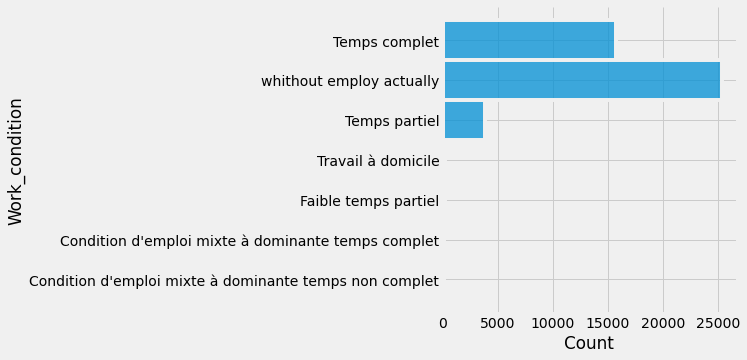

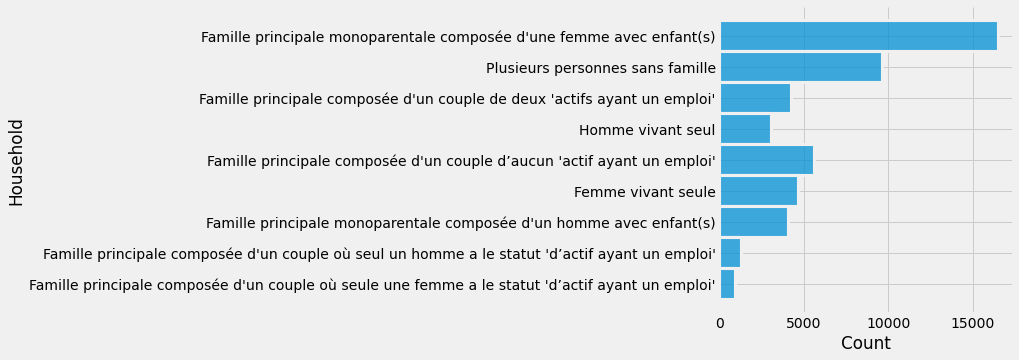

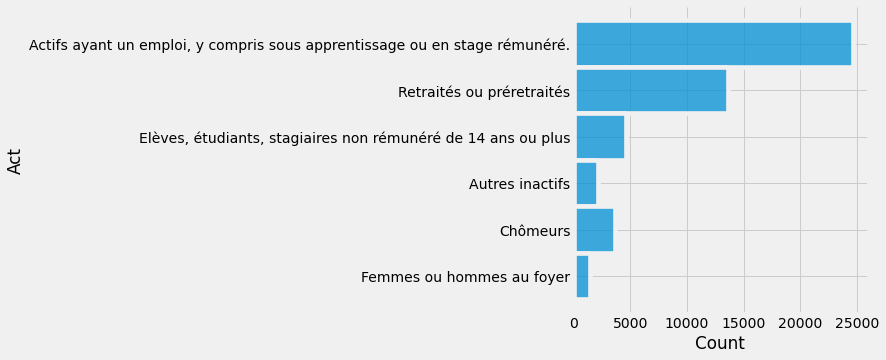

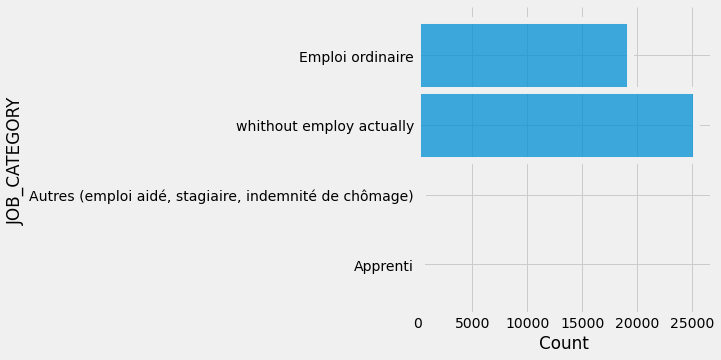

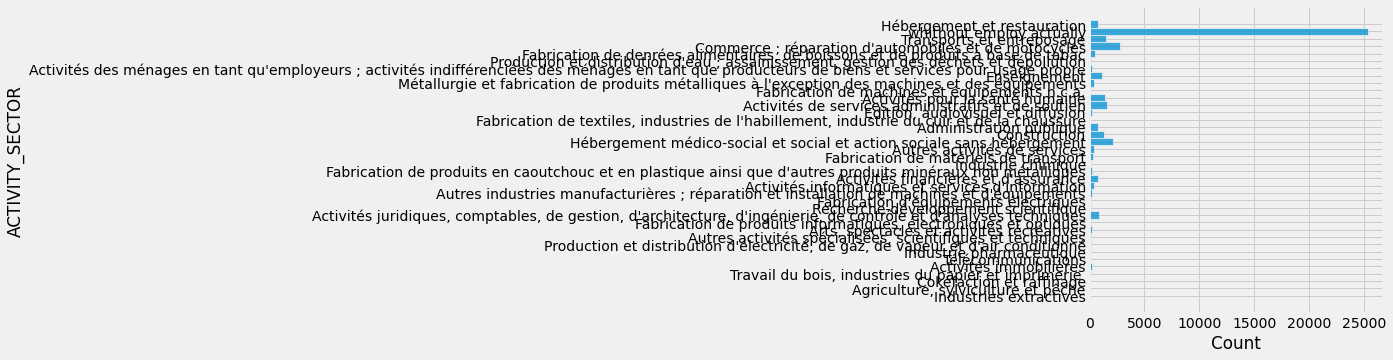

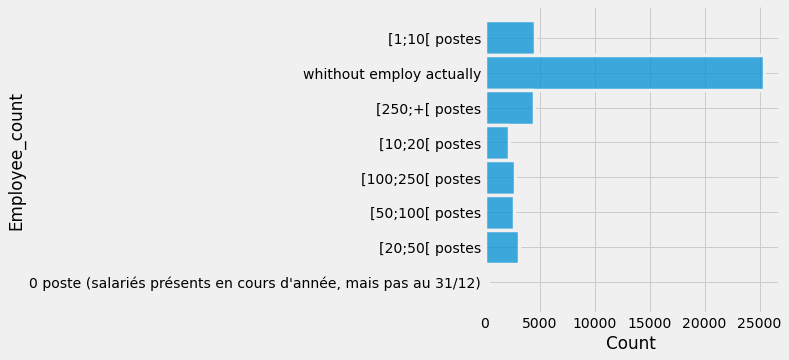

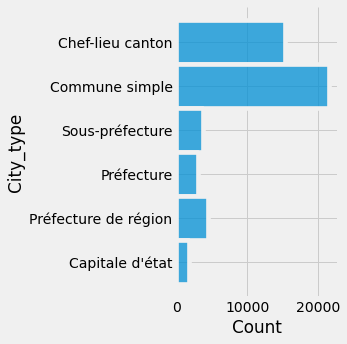

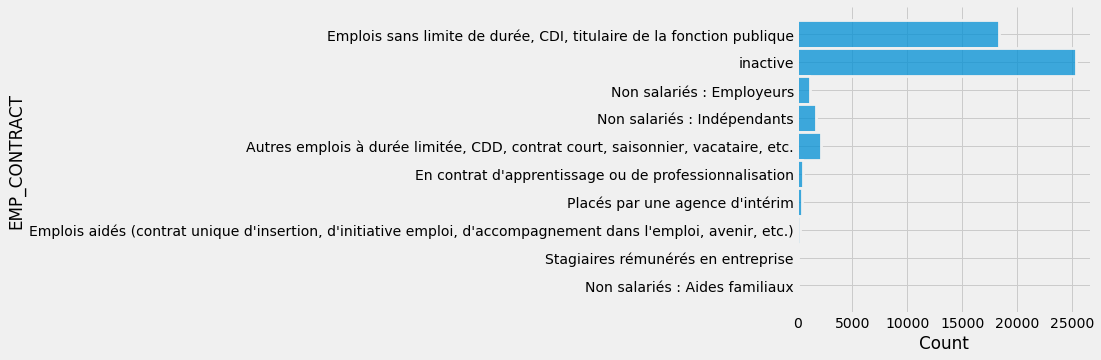

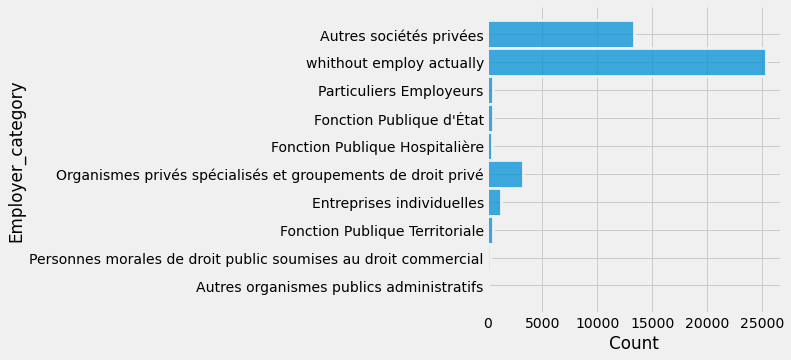

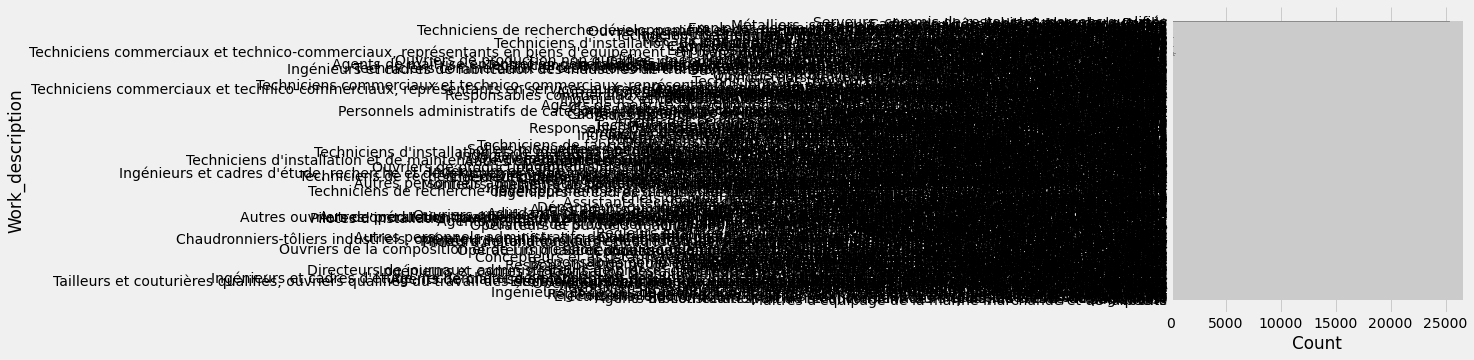

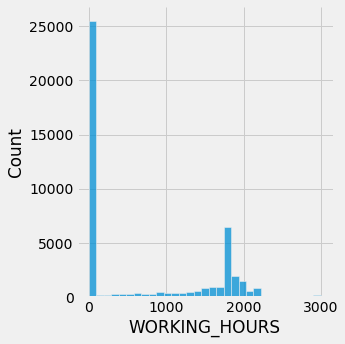

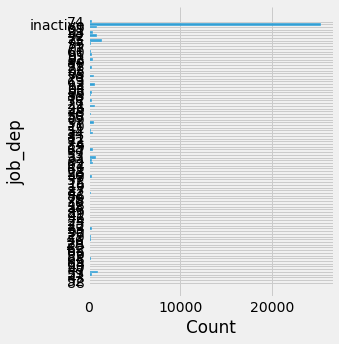

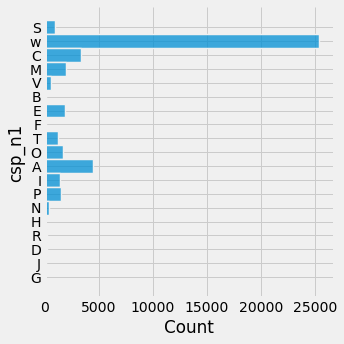

In [1361]:
for i in ['target', 'age_2020']:
    sns.displot(df_encode, x=i,kind="kde",common_norm=False)

for i in ['Wage', 'WORKING_HOURS']:
    sns.displot(d_wmv_toc, x=i,kind="kde",common_norm=False)
    
    
with sns.axes_style('white'):    
    for i in ['IS_STUDENT', 'SEX']:
        sns.displot(df_encode, x=i,kind="hist",common_norm=False)
sns.displot(df_encode, y='Nom de la région',kind="hist",common_norm=False)
sns.displot(df_encode, y='highest_degree',kind="hist",common_norm=False)
sns.displot(d_wmv_toc, y='Work_condition',kind="hist",common_norm=False)
sns.displot(df_encode, y='Household',kind="hist",common_norm=False)
sns.displot(df_encode, y='Act',kind="hist",common_norm=False)
sns.displot(d_wmv_toc, y='JOB_CATEGORY',kind="hist",common_norm=False)
sns.displot(d_wmv_toc, y='ACTIVITY_SECTOR',kind="hist",common_norm=False)
sns.displot(d_wmv_toc, y='Employee_count',kind="hist",common_norm=False)
sns.displot(df_encode, y='City_type',kind="hist",common_norm=False)
sns.displot(df_encode, y='EMP_CONTRACT',kind="hist",common_norm=False)
sns.displot(d_wmv_toc, y='Employer_category',kind="hist",common_norm=False)
sns.displot(d_wmv_toc, y=  'Work_description',kind="hist",common_norm=False) #unreadible
sns.displot(d_wmv_toc, x='WORKING_HOURS',kind="hist",common_norm=False)

sns.displot(d_wmv_toc, y=  'job_dep',kind="hist",common_norm=False) #unreadible, as we can see
sns.displot(d_wmv_toc, y=  'csp_n1',kind="hist",common_norm=False)

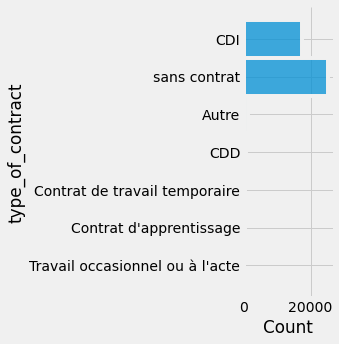

In [1362]:
sns.displot(d_wmv_toc, y=  'type_of_contract',kind="hist",common_norm=False)

In [1363]:
#Lats dealing with the missing values

In [1364]:
df_encode.loc[df_encode['Wage'].isna(), 'Wage'] = median_wage
df_encode.loc[df_encode['Wage'].isna(), 'WORKING_HOURS'] = median_WH

In [1365]:
df_encode_test.loc[df_encode_test['Wage'].isna(), 'Wage'] = median_wage1
df_encode_test.loc[df_encode_test['Wage'].isna(), 'WORKING_HOURS'] = median_WH1

Concerning the vategorical variables, we will implement the most frequent 

In [1366]:
nb_hwf_nan_contr = df_encode.loc[(df_encode['EMP_CONTRACT'] == 'Non salariés : Employeurs'), 'type_of_contract'].isna().sum()
print('nber of employer with a missing value in "contract":', nb_hwf_nan_contr)

nb_hwf_nan_contr1 = df_encode.loc[(df_encode['EMP_CONTRACT'] == 'Non salariés : Indépendants'), 'type_of_contract'].isna().sum()
print('nber of indépendants with a missing value in "contract":', nb_hwf_nan_contr1)
print(nb_hwf_nan_contr+nb_hwf_nan_contr1)
print('missing values left in "type_of_contract":', df_total_lrn['type_of_contract'].isna().sum())

nber of employer with a missing value in "contract": 1172
nber of indépendants with a missing value in "contract": 1717
2889
missing values left in "type_of_contract": 4497


In [1367]:
df_encode.loc[df_encode['Work_condition'].isna(), 'Work_condition'] = 'temps complet'
df_encode.loc[df_encode['JOB_CATEGORY'].isna(), 'JOB_CATEGORY'] = 'Emploi ordinaire'
df_encode.loc[df_encode['ACTIVITY_SECTOR'].isna(), 'ACTIVITY_SECTOR'] = "Commerce;réparation d'automobiles et de motocycles"
df_encode.loc[df_encode['Employee_count'].isna(), 'Employee_count'] = '[1;10[ postes'
df_encode.loc[(df_encode['type_of_contract'].isna())&(df_encode['EMP_CONTRACT'] == 'Non salariés : Indépendants'), 'type_of_contract'] = 'Entrepreneur'
df_encode.loc[(df_encode['type_of_contract'].isna())&(df_encode['EMP_CONTRACT'] == 'Non salariés : Employeurs'), 'type_of_contract'] = 'Entrepreneur'
df_encode.loc[df_encode['type_of_contract'].isna(), 'type_of_contract'] = 'CDI'
df_encode.loc[df_encode['csp_n1'].isna(), 'csp_n1'] = 'A'
df_encode.loc[df_encode['Employer_category'].isna(), 'Employer_category'] = 'Autres sociétés privées'


In [1368]:
df_encode_test.loc[df_encode_test['Work_condition'].isna(), 'Work_condition'] = 'temps complet'
df_encode_test.loc[df_encode_test['JOB_CATEGORY'].isna(), 'JOB_CATEGORY'] = 'Emploi ordinaire'
df_encode_test.loc[df_encode_test['ACTIVITY_SECTOR'].isna(), 'ACTIVITY_SECTOR'] = "Commerce;réparation d'automobiles et de motocycles"
df_encode_test.loc[df_encode_test['Employee_count'].isna(), 'Employee_count'] = '[1;10[ postes'
df_encode_test.loc[(df_encode_test['type_of_contract'].isna())&(df_encode_test['EMP_CONTRACT'] == 'Non salariés : Indépendants'), 'type_of_contract'] = 'Entrepreneur'
df_encode_test.loc[(df_encode_test['type_of_contract'].isna())&(df_encode_test['EMP_CONTRACT'] == 'Non salariés : Employeurs'), 'type_of_contract'] = 'Entrepreneur'
df_encode_test.loc[df_encode_test['type_of_contract'].isna(), 'type_of_contract'] = 'CDI'
df_encode_test.loc[df_encode_test['csp_n1'].isna(), 'csp_n1'] = 'A'
df_encode_test.loc[df_encode_test['Employer_category'].isna(), 'Employer_category'] = 'Autres sociétés privées'

### let's study dependance of variables with the target variable

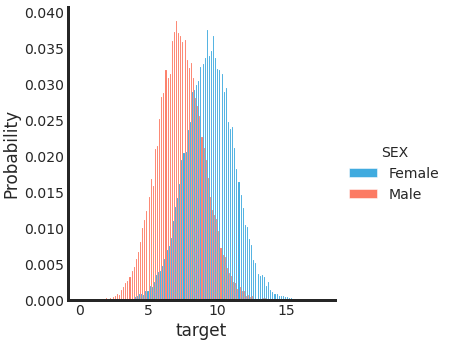

In [1369]:
with sns.axes_style('white'):
    sns.displot(df_encode, x="target",hue="SEX",kind="hist",multiple="dodge",stat="probability",common_norm=False)

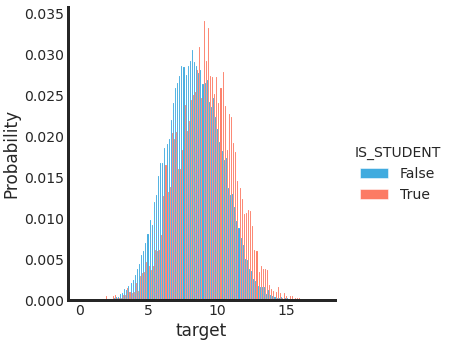

In [1370]:
with sns.axes_style('white'):
    sns.displot(df_encode, x="target",hue="IS_STUDENT",kind="hist",multiple="dodge",stat="probability",common_norm=False)

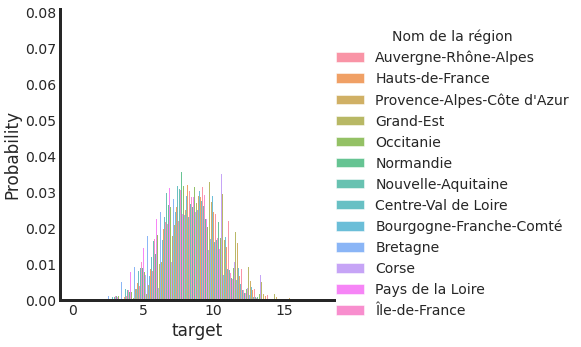

In [1371]:
with sns.axes_style('white'):
    sns.displot(df_encode, x="target",hue="Nom de la région",kind="hist",multiple="dodge",stat="probability",common_norm=False)

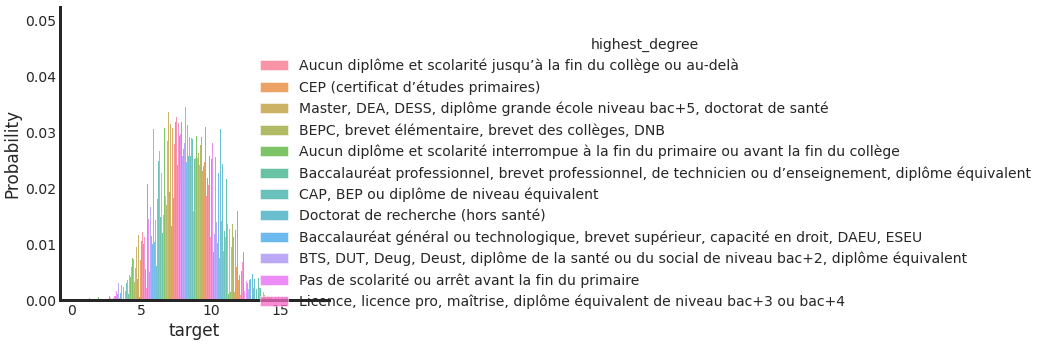

In [1372]:
with sns.axes_style('white'):
    sns.displot(df_encode, x="target",hue="highest_degree", multiple="dodge",kind="hist",stat="probability",common_norm=False)

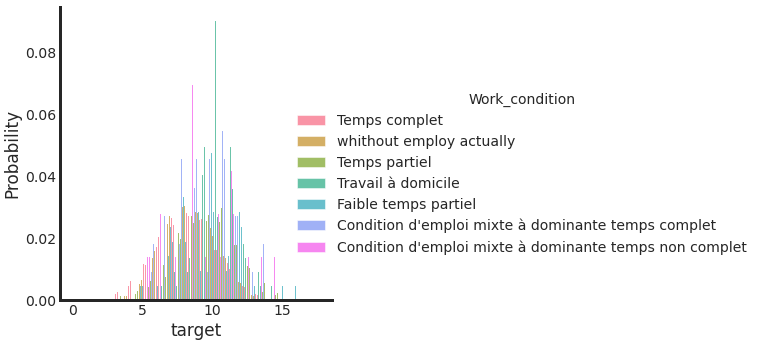

In [1373]:
with sns.axes_style('white'):
    sns.displot(df_encode, x="target",hue="Work_condition",kind="hist",multiple="dodge",stat="probability",common_norm=False)

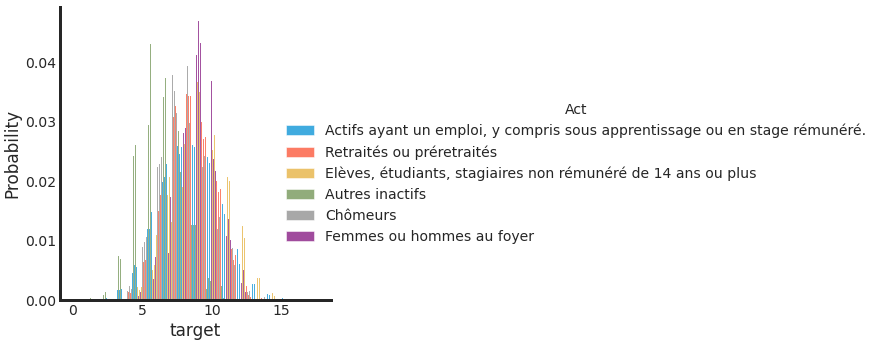

In [1374]:
with sns.axes_style('white'):
    sns.displot(df_encode, x="target",hue="Act",kind="hist",multiple="dodge",stat="probability",common_norm=False)

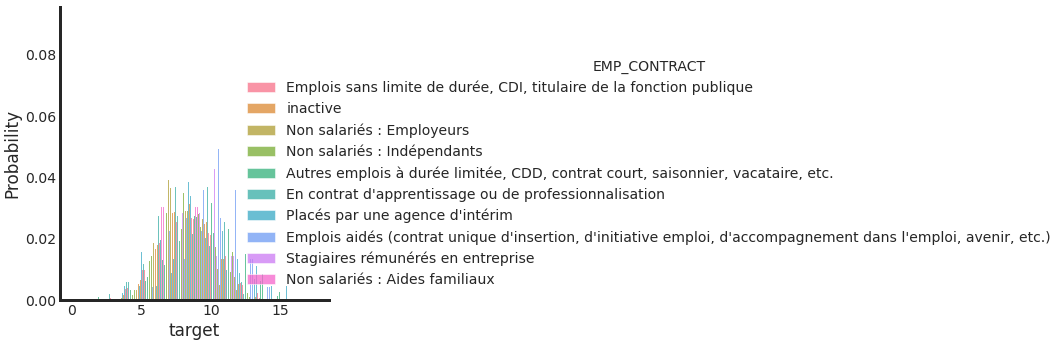

In [1375]:
plt.style.use('fivethirtyeight')
with sns.axes_style('white'):
    sns.displot(df_encode, x="target",hue="EMP_CONTRACT",kind="hist",multiple="dodge",stat="probability",common_norm=False)

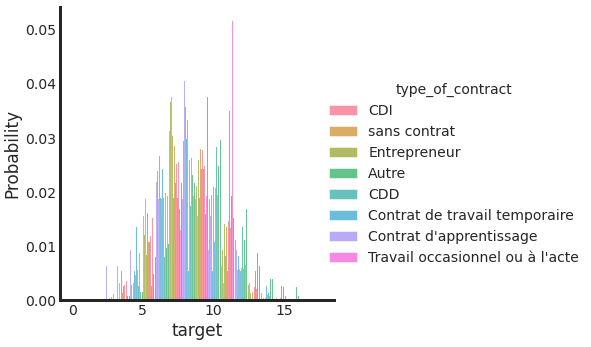

In [1376]:
with sns.axes_style('white'):
    sns.displot(df_encode, x="target",hue="type_of_contract",kind="hist",multiple="dodge",stat="probability",common_norm=False)

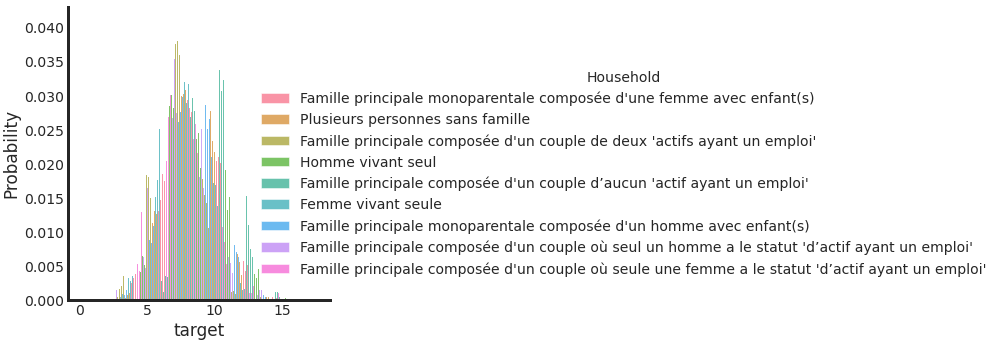

In [1377]:
with sns.axes_style('white'):
    sns.displot(df_encode, x="target",hue="Household",kind="hist",multiple="dodge",stat="probability",common_norm=False)

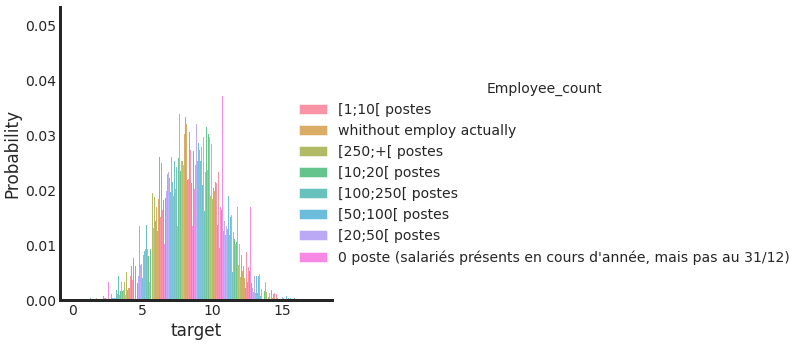

In [1378]:
with sns.axes_style('white'):
    sns.displot(df_encode, x="target",hue="Employee_count",kind="hist",multiple="dodge",stat="probability",common_norm=False)

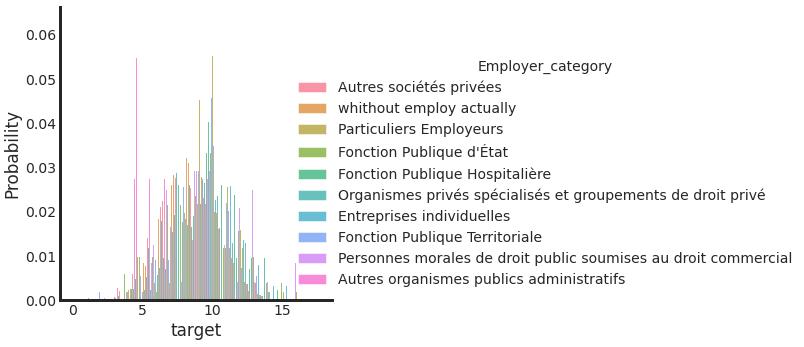

In [1379]:
with sns.axes_style('white'):
    sns.displot(df_encode, x="target",hue="Employer_category",kind="hist",multiple="dodge",stat="probability",common_norm=False)

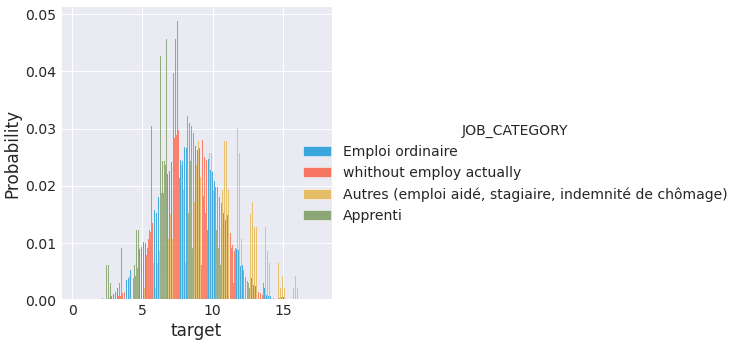

In [1380]:
with sns.axes_style('darkgrid'):
    sns.displot(df_encode, x="target",hue="JOB_CATEGORY",kind="hist",multiple="dodge",stat="probability",common_norm=False)

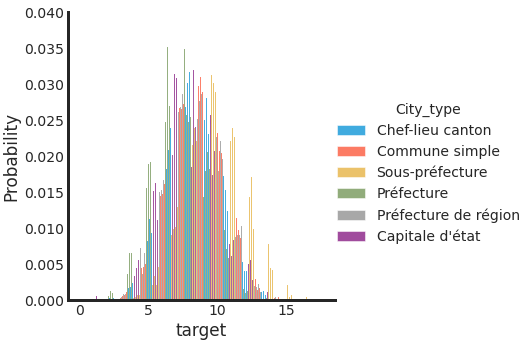

In [1381]:
with sns.axes_style('white'):
    sns.displot(df_encode, x="target",hue="City_type",kind="hist",multiple="dodge",stat="probability",common_norm=False)

### lats creation of variable

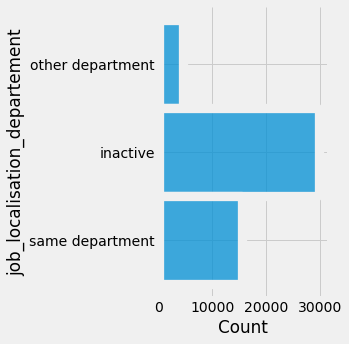

In [1382]:
#du to the too high number of dep, that we just observed, it could be probably more interesting to create another variable for job dep : works in his department, or not in his department

cond1 = df_encode['job_dep']==df_encode['Dep']
cond2 = df_encode['job_dep']=='inactive'
cond3=df_encode_test['job_dep']==df_encode_test['Dep']
cond4 = df_encode_test['job_dep']=='inactive'

df_encode['job_localisation_departement']=np.where(cond1, 'same department', 'other department')
df_encode['job_localisation_departement']=np.where(cond2, 'inactive', df_encode['job_localisation_departement'])
sns.displot(df_encode, y=  'job_localisation_departement',kind="hist",common_norm=False)

df_encode_test['job_localisation_departement']=np.where(cond3, 'same department', 'other department')
df_encode_test['job_localisation_departement']=np.where(cond4, 'inactive', df_encode_test['job_localisation_departement'])

df_encode.loc[df_encode['job_localisation_departement'].isna(), 'job_localisation_departement'] = 'same department'

## 5)  Dealing with the outliers

C:\Users\Hannah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wage', ylabel='type_of_contract'>

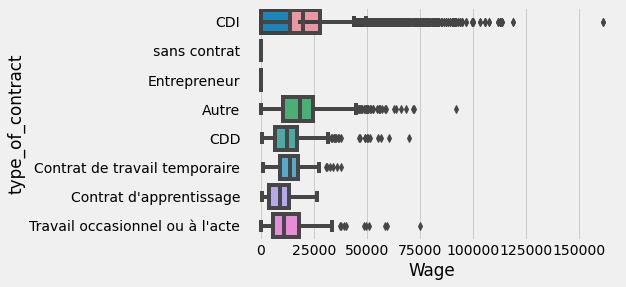

In [1383]:
sns.boxplot(df_encode['Wage'])
sns.boxplot(y='type_of_contract',x='Wage',data=df_encode)

C:\Users\Hannah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WORKING_HOURS'>

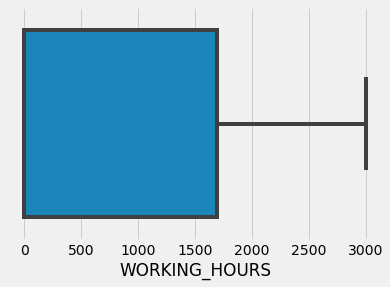

In [1384]:
sns.boxplot(df_encode['WORKING_HOURS'])

C:\Users\Hannah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_2020'>

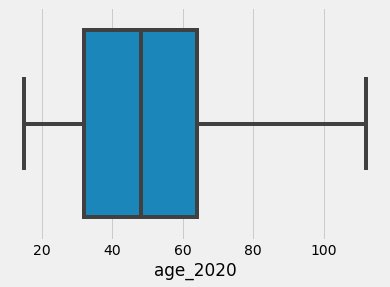

In [1385]:
sns.boxplot(df_encode['age_2020'])

In [1386]:
df_encode.shape

(50001, 38)

## 6) Drop useless variables

In [1387]:
del df_encode['job_dep']
del df_encode_test['job_dep']

In [1388]:
del df_encode['sports']
del df_encode_test['sports']


In [1389]:
del df_encode['Work_description']
del df_encode_test['Work_description']

In [1390]:
#drop unusefull geographical variables?
del df_encode['insee']#info gave by the commune
del df_encode['Reg'] #same info that "nom de la région"
del df_encode['Dep'] #same informations that "nom du département"S

del df_encode_test['insee']#info gave by the commune
del df_encode_test['Reg'] #same info that "nom de la région"
del df_encode_test['Dep']
#del df_encode_test['insee', 'Reg','Dep']

In [1391]:
df_encode.head()

,occupation_42,highest_degree,age_2020,Household,SEX,IS_STUDENT,Act,target,Wage,Work_condition,...,Long,INHABITANTS,Nom du département,Nom de la région,EMP,toc,wage,club,csp_n1,job_localisation_departement
0,Personnels des services directs aux particuliers,Aucun diplôme et scolarité jusqu’à la fin du c...,59,Famille principale monoparentale composée d'un...,Female,False,"Actifs ayant un emploi, y compris sous apprent...",9.6545,15575.0,Temps complet,...,5.372926,14557,Ain,Auvergne-Rhône-Alpes,True,True,True,True,S,other department
1,Anciens ouvriers,CEP (certificat d’études primaires),70,Plusieurs personnes sans famille,Male,False,Retraités ou préretraités,8.4466,0.0,whithout employ actually,...,5.372926,14557,Ain,Auvergne-Rhône-Alpes,False,False,False,True,w,inactive
2,Anciens ouvriers,"Master, DEA, DESS, diplôme grande école niveau...",78,Famille principale composée d'un couple de deu...,Male,False,Retraités ou préretraités,6.5772,0.0,whithout employ actually,...,5.372926,14557,Ain,Auvergne-Rhône-Alpes,False,False,False,False,w,inactive
3,"Elèves, étudiants","BEPC, brevet élémentaire, brevet des collèges,...",18,Famille principale monoparentale composée d'un...,Female,True,"Elèves, étudiants, stagiaires non rémunéré de ...",11.2192,0.0,whithout employ actually,...,5.372926,14557,Ain,Auvergne-Rhône-Alpes,False,False,False,False,w,inactive
4,Personnes diverses sans activité professionne...,Aucun diplôme et scolarité jusqu’à la fin du c...,16,Famille principale monoparentale composée d'un...,Female,True,Autres inactifs,5.5074,0.0,whithout employ actually,...,5.372926,14557,Ain,Auvergne-Rhône-Alpes,False,False,False,False,w,inactive


In [1392]:
df_copie=df_encode.copy(deep=True)


In [1393]:
yc = df_copie['target']
Xc = df_copie.drop('target', axis=1)

## 7) reencoding of categorical variable, and normalisation

In [1394]:
#selecting only numerical input variables
numdf = df_encode.select_dtypes(include=np.number)
numdf=numdf.drop('target', axis=1)
numcopy=df_total_lrn_copy.select_dtypes(include=np.number)
numcopy=numcopy.drop('target', axis=1)
numdf.head()

,age_2020,Wage,WORKING_HOURS,X,Y,Lat,Long,INHABITANTS
0,59,15575.0,1906.0,883750.723216,6.542887e+06,45.960848,5.372926,14557
1,70,0.0,0.0,883750.723216,6.542887e+06,45.960848,5.372926,14557
2,78,0.0,0.0,883750.723216,6.542887e+06,45.960848,5.372926,14557
3,18,0.0,0.0,883750.723216,6.542887e+06,45.960848,5.372926,14557
4,16,0.0,0.0,883750.723216,6.542887e+06,45.960848,5.372926,14557


In [1395]:
numdf_test = df_encode_test.select_dtypes(include=np.number)

In [1396]:
#normalisation of those variables
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(numdf)
scaler.fit_transform(numcopy)
numcopy.head()
X_MinMax= RobustScaler().fit_transform(numdf)
X_MinMaxcopy= RobustScaler().fit_transform(numcopy)
l=[x for x in range(50001)]
df_normal = pd.DataFrame(data=X_MinMax, index=l,columns=["age_2020", "Wage","WORKING_HOURS","X","Y","Lat","Long","INHABITANTS"])
#df_normalcopy = pd.DataFrame(data=X_MinMaxcopy, index=l,columns=["age_2020", "Wage","WORKING_HOURS","X","Y","Lat","Long","INHABITANTS",'Reg'])
df_normal.head()

,age_2020,Wage,WORKING_HOURS,X,Y,Lat,Long,INHABITANTS
0,0.34375,0.890814,1.127144,0.774392,-0.444573,-0.432927,0.768805,0.066107
1,0.68750,0.000000,0.000000,0.774392,-0.444573,-0.432927,0.768805,0.066107
2,0.93750,0.000000,0.000000,0.774392,-0.444573,-0.432927,0.768805,0.066107
3,-0.93750,0.000000,0.000000,0.774392,-0.444573,-0.432927,0.768805,0.066107
4,-1.00000,0.000000,0.000000,0.774392,-0.444573,-0.432927,0.768805,0.066107


In [1397]:
numdf_test.columns

Index(['age_2020', 'Wage', 'WORKING_HOURS', 'X', 'Y', 'Lat', 'Long',
       'INHABITANTS'],
      dtype='object')

In [1398]:
scaler.fit_transform(numdf_test)

X_MinMax_test= RobustScaler().fit_transform(numdf_test)
l=[x for x in range(49999)]
df_normal_test = pd.DataFrame(data=X_MinMax_test, index=l,columns=["age_2020", "Wage","WORKING_HOURS","X","Y","Lat","Long","INHABITANTS"])

In [1399]:
df_normal_test.head()

,age_2020,Wage,WORKING_HOURS,X,Y,Lat,Long,INHABITANTS
0,1.43750,0.000000,NaN,0.77967,-0.45853,-0.44505,0.770973,0.063208
1,0.68750,0.000000,NaN,0.77967,-0.45853,-0.44505,0.770973,0.063208
2,-0.84375,0.327278,-3.237581,0.77967,-0.45853,-0.44505,0.770973,0.063208
3,-0.90625,0.000000,NaN,0.77967,-0.45853,-0.44505,0.770973,0.063208
4,0.46875,0.000000,NaN,0.77967,-0.45853,-0.44505,0.770973,0.063208


In [1400]:
#We need to change categorical variable type, in order to do our machine learning algorithme
h=['age_2020','Wage','WORKING_HOURS','X','Y','Lat','Long','INHABITANTS']
for i in range(len(h)):
    del df_encode[h[i]]
    del df_encode_test[h[i]]
    
le = preprocessing.LabelEncoder()
l=["occupation_42",'highest_degree','Household','SEX','Act'
   ,'Work_condition','JOB_CATEGORY','ACTIVITY_SECTOR','Employee_count','type_of_contract',
   'Employer_category','EMP_CONTRACT','Nom de la commune','City_type',
   'Nom du département','Nom de la région','job_localisation_departement','csp_n1']
l2=["occupation_42",'highest_degree','Household','SEX','Act'
   ,'Work_condition','JOB_CATEGORY','ACTIVITY_SECTOR','Employee_count','type_of_contract',
   'Employer_category','EMP_CONTRACT','Nom de la commune','City_type',
   'Nom du département','Nom de la région','Dep','insee','Work_description','sports' ]
for i in range(len(l)):
   df_encode[l[i]] = le.fit_transform(df_encode[l[i]])
#for i in range(len(l2)):
#   df_total_lrn_copy[l2[i]] = le.fit_transform(df_total_lrn_copy[l2[i]])

for i in range(len(l)):
   df_encode_test[l[i]] = le.fit_transform(df_encode_test[l[i]])


In [1401]:
df_encode.head()
#df_total_lrn_copy.head()

,occupation_42,highest_degree,Household,SEX,IS_STUDENT,Act,target,Work_condition,JOB_CATEGORY,ACTIVITY_SECTOR,...,Nom de la commune,City_type,Nom du département,Nom de la région,EMP,toc,wage,club,csp_n1,job_localisation_departement
0,29,1,5,0,False,0,9.6545,3,2,25,...,171,1,0,0,True,True,True,True,15,1
1,8,7,8,1,False,5,8.4466,6,3,37,...,171,1,0,0,False,False,False,True,18,0
2,8,10,0,1,False,5,6.5772,6,3,37,...,171,1,0,0,False,False,False,False,18,0
3,18,2,5,0,True,3,11.2192,6,3,37,...,171,1,0,0,False,False,False,False,18,0
4,30,1,5,0,True,1,5.5074,6,3,37,...,171,1,0,0,False,False,False,False,18,0


In [1402]:
df_encode = pd.merge(df_encode, df_normal, left_index=True, right_index=True)
df_encode_test = pd.merge(df_encode_test, df_normal_test, left_index=True, right_index=True)
df_encode_test.columns
#df_total_lrn_copy = pd.merge(df_total_lrn_copy, df_normalcopy, left_index=True, right_index=True)

Index(['occupation_42', 'highest_degree', 'Household', 'SEX', 'IS_STUDENT',
       'Act', 'Work_condition', 'JOB_CATEGORY', 'ACTIVITY_SECTOR',
       'Employee_count', 'type_of_contract', 'Employer_category',
       'EMP_CONTRACT', 'Nom de la commune', 'City_type', 'Nom du département',
       'Nom de la région', 'club', 'csp_n1', 'job_localisation_departement',
       'age_2020', 'Wage', 'WORKING_HOURS', 'X', 'Y', 'Lat', 'Long',
       'INHABITANTS'],
      dtype='object')

## 8) Save data merged and encoded

In [1403]:
#df_encode.to_csv('project-21-files/total_data_encoded.csv', encoding='utf-8')
#df_encode_test.to_csv('')

# Machine learning algorithme

#### i) separation of the target and the features

In [1404]:
y = df_encode['target']
X = df_encode.drop('target', axis=1)

X.head()

,occupation_42,highest_degree,Household,SEX,IS_STUDENT,Act,Work_condition,JOB_CATEGORY,ACTIVITY_SECTOR,Employee_count,...,csp_n1,job_localisation_departement,age_2020,Wage,WORKING_HOURS,X,Y,Lat,Long,INHABITANTS
0,29,1,5,0,False,0,3,2,25,3,...,15,1,0.34375,0.890814,1.127144,0.774392,-0.444573,-0.432927,0.768805,0.066107
1,8,7,8,1,False,5,6,3,37,7,...,18,0,0.68750,0.000000,0.000000,0.774392,-0.444573,-0.432927,0.768805,0.066107
2,8,10,0,1,False,5,6,3,37,7,...,18,0,0.93750,0.000000,0.000000,0.774392,-0.444573,-0.432927,0.768805,0.066107
3,18,2,5,0,True,3,6,3,37,7,...,18,0,-0.93750,0.000000,0.000000,0.774392,-0.444573,-0.432927,0.768805,0.066107
4,30,1,5,0,True,1,6,3,37,7,...,18,0,-1.00000,0.000000,0.000000,0.774392,-0.444573,-0.432927,0.768805,0.066107


#### ii) Creation of a smaller data set, stratisfied

In [1405]:
#ycopy= df_total_lrn_copy['target']
#Xcopy = df_total_lrn_copy.drop('target', axis=1)

In [1406]:
# Create the bins.  My `y` variable has
# 50001 observations, and I want 50 bins.

bins = np.linspace(0, 50000, 50)
# Save your Y values in a new ndarray,
# broken down by the bins created above.

y_binned = np.digitize(y, bins)
# Pass y_binned to the stratify argument,
# and sklearn will handle the rest

Xb_little, Xb_autre, yb_little, yb_autre = train_test_split(df_encode, y, train_size=0.05, stratify=y_binned, random_state=0)


In [1407]:
df_little=pd.concat([yb_little,Xb_little])

In [1408]:
df_little.describe()
ylittle= df_little['target']
Xlittle = df_little.drop('target', axis=1)

C:\Users\Hannah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

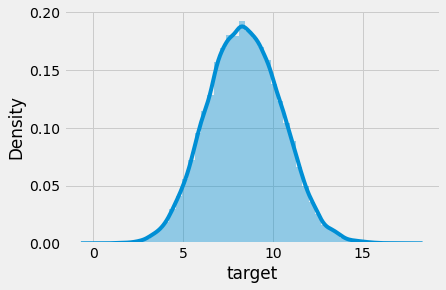

In [1409]:
sns.distplot(y, kde=True)

C:\Users\Hannah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

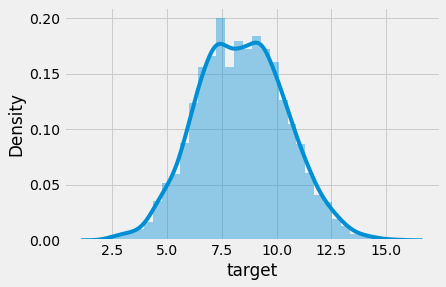

In [1410]:
sns.distplot(yb_little, kde=True)

#### iii) feature selection : Variance threshold

In [1411]:
from sklearn.feature_selection import VarianceThreshold

In [1412]:
selector=VarianceThreshold(threshold= 0.3)

In [1413]:
selector.fit_transform(X)

array([[29, 1, 5, ..., -0.4329268048488427, 0.7688052817771348,
        0.0661065441650548],
       [8, 7, 8, ..., -0.4329268048488427, 0.7688052817771348,
        0.0661065441650548],
       [8, 10, 0, ..., -0.4329268048488427, 0.7688052817771348,
        0.0661065441650548],
       ...,
       [19, 7, 5, ..., 0.39289076395983974, -0.013653154163259651,
        0.3352877176015474],
       [22, 2, 7, ..., 0.39289076395983974, -0.013653154163259651,
        0.3352877176015474],
       [37, 7, 5, ..., 0.39289076395983974, -0.013653154163259651,
        0.3352877176015474]], dtype=object)

In [1414]:
X.shape

(50001, 31)

## 1) Linear algorithme

### Preliminary: Select a good train_size

In [1415]:
#Select a good train_size
from sklearn.metrics import mean_squared_error
values = []

for n in np.linspace(0.01,0.99,20):
    X_train,X_test,y_train,y_test=train_test_split(X, y, train_size = n, random_state=42)

  
    model = LinearRegression()
 
    model.fit(X_train,y_train)

    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    score = model.score(X_test,y_test) - model.score(X_train,y_train)
    mse_test = mean_squared_error(y_test,predict_test)
    values.append([n,score,mse_test])
names = ['train_size','score','mse_test'] 
metrics = pd.DataFrame(values, columns = names)

In [1416]:
metrics.head(20)

,train_size,score,mse_test
0,0.010000,-0.034435,2.015017
1,0.061579,-0.018580,1.902025
2,0.113158,-0.014717,1.894649
3,0.164737,-0.016022,1.899782
4,0.216316,-0.018740,1.903804
5,0.267895,-0.012102,1.897446
6,0.319474,-0.009104,1.891000
7,0.371053,-0.010131,1.896124
8,0.422632,-0.007772,1.886476
9,0.474211,-0.004671,1.879972


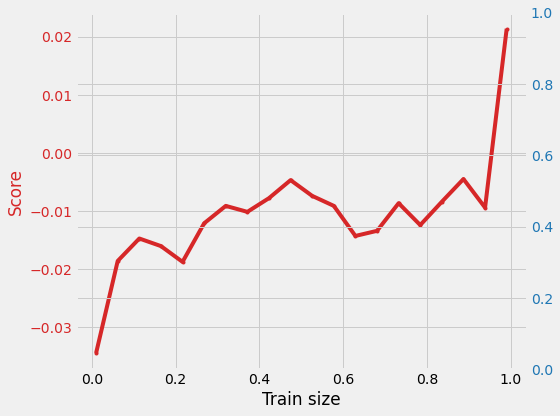

In [1417]:
fig, ax1 = plt.subplots(figsize = (8,6))

color = 'tab:red'
ax1.set_xlabel('Train size')
ax1.set_ylabel('Score', color=color)
ax1.plot(metrics.train_size[:],metrics.score[:], marker = '.', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'

ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

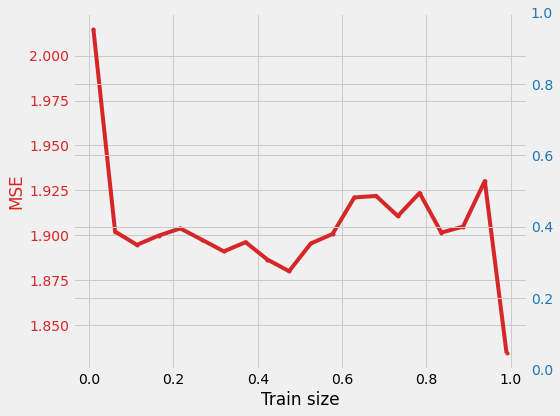

In [1418]:
fig, ax1 = plt.subplots(figsize = (8,6))

color = 'tab:red'
ax1.set_xlabel('Train size')
ax1.set_ylabel('MSE', color=color)
ax1.plot(metrics.train_size , metrics.mse_test , marker = '.', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()# instantiate a second axes that shares the same x-axis

color = 'tab:blue'

ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.show()

In [1419]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size = 1/3, random_state=42)

#X_trainlittle,X_testlittle,y_trainlittle,y_testlittle=train_test_split(Xlittle, ylittle, train_size = 1/3, random_state=42)

### ii. Run a simple linear regression

In [1420]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [1421]:
y_pred = regressor.predict(X_test)

In [1422]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
33553,7.2877,10.138791
9427,11.0819,8.079580
199,11.8128,10.532235
12447,5.6419,6.087614
39489,6.7257,7.739607
...,...,...
3325,11.4834,10.605651
6283,10.1572,11.290282
40335,10.3248,10.724594
21655,8.7379,7.372829


In [1423]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
scores 

array([0.55256115, 0.5486682 , 0.56054811, 0.56346445, 0.53916611])

In [1424]:
# can tune other metrics, such as MSE
scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores.mean()

-1.8764544080087375

In [1425]:
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=5)
scores.mean()

0.5527992053515713

In [1426]:
from sklearn.metrics import r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.8928730347726208
0.5458525061279084


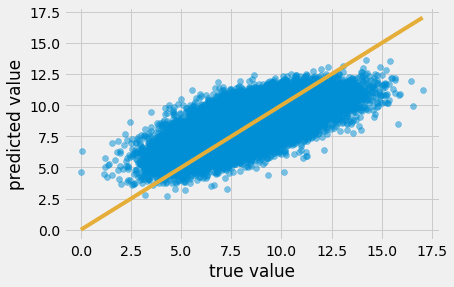

In [1427]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("true value")
plt.ylabel("predicted value")
plt.plot([0,y_test.max()],[0,y_test.max()],color='C2')

#### Let's do a gridsearch, with a feature selection

In [1428]:
from sklearn.feature_selection import RFE
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 32))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 31 candidates, totalling 155 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [1429]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.245345,0.020852,0.007181,0.000745,1,{'n_features_to_select': 1},-4.091662,-4.125858,-4.223831,-4.298733,...,-4.185925,0.073033,31,-4.207829,-4.198818,-4.174225,-4.155658,-4.183172,-4.183940,0.018368
1,0.235372,0.007382,0.009175,0.001466,2,{'n_features_to_select': 2},-4.081959,-4.105930,-4.221483,-4.277135,...,-4.171374,0.072077,30,-4.191528,-4.185131,-4.156322,-4.142407,-4.169296,-4.168937,0.018087
2,0.244946,0.010279,0.008776,0.001595,3,{'n_features_to_select': 3},-3.824428,-3.851194,-3.909754,-3.964945,...,-3.894721,0.050614,29,-3.909726,-3.902604,-3.888039,-3.874185,-3.884890,-3.891889,0.012729
3,0.244149,0.007964,0.009773,0.002632,4,{'n_features_to_select': 4},-3.817033,-3.842817,-3.898824,-3.964561,...,-3.887160,0.052262,28,-3.901846,-3.894990,-3.881083,-3.864654,-3.877873,-3.884089,0.013111
4,0.254519,0.022499,0.012566,0.004991,5,{'n_features_to_select': 5},-2.630586,-2.658273,-2.642340,-2.630783,...,-2.641822,0.010461,27,-2.642010,-2.635058,-2.638859,-2.641859,-2.637814,-2.639120,0.002612
5,0.235772,0.013179,0.010171,0.001718,6,{'n_features_to_select': 6},-2.522270,-2.564757,-2.523219,-2.500130,...,-2.532428,0.023022,26,-2.532197,-2.521635,-2.531835,-2.537741,-2.524823,-2.529646,0.005732
6,0.239561,0.027433,0.009173,0.001829,7,{'n_features_to_select': 7},-2.520975,-2.562343,-2.519351,-2.498039,...,-2.531411,0.024277,25,-2.530573,-2.520304,-2.531010,-2.536324,-2.521982,-2.528039,0.006007
7,0.225000,0.006165,0.008776,0.001323,8,{'n_features_to_select': 8},-2.278323,-2.271759,-2.215006,-2.252515,...,-2.270671,0.039302,24,-2.265139,-2.267047,-2.281132,-2.271731,-2.251328,-2.267275,0.009704
8,0.282644,0.034672,0.012766,0.001716,9,{'n_features_to_select': 9},-2.165047,-2.167972,-2.135683,-2.130292,...,-2.162833,0.030221,23,-2.158403,-2.157924,-2.166117,-2.167230,-2.146338,-2.159202,0.007484
9,0.273469,0.012383,0.012368,0.001739,10,{'n_features_to_select': 10},-2.163680,-2.167028,-2.114403,-2.082433,...,-2.141721,0.037233,22,-2.158155,-2.157513,-2.113835,-2.121310,-2.096970,-2.129557,0.024399


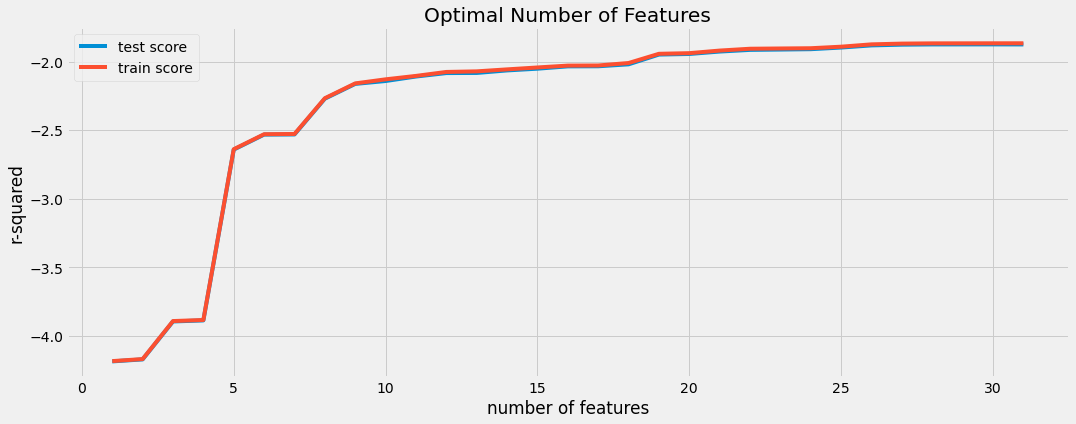

In [1430]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [1431]:
import sklearn
# final model
n_features_optimal = 31
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)   

rfe = rfe.fit(X_train, y_train)


# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

print(r2)
print(mean_squared_error(y_test,y_pred))

0.5458525061279084
1.8928730347726208


### ii.  One generalised linear model: Ridge regression

In [1432]:
from sklearn.linear_model import Ridge

In [1433]:
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, y_train)# get cross val scores
y_predridge = ridge.predict(X_test)

In [1434]:
#the internal CV score
scores = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores.mean()

-1.8764861500515475

In [1435]:
scores = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=5)
scores.mean()

0.5527924530320458

In [1436]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predridge})
df

,Actual,Predicted
33553,7.2877,10.143088
9427,11.0819,8.068541
199,11.8128,10.535034
12447,5.6419,6.066888
39489,6.7257,7.752587
...,...,...
3325,11.4834,10.618934
6283,10.1572,11.284722
40335,10.3248,10.722666
21655,8.7379,7.372617


In [1437]:
#the real score, on the test set is
print(mean_squared_error(y_test,y_predridge))
print(r2_score(y_test,y_predridge))

1.8923573859561373
0.5459762231514076


In [1438]:
from sklearn.model_selection import validation_curve

In [1439]:
train_score,val_score=validation_curve(Ridge(),X_train, y_train, param_name='alpha', param_range= np.logspace(-7, 3, 3),cv=5)
val_score.mean()

C:\Users\Hannah\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.36039e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Hannah\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.32361e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Hannah\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.30924e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Hannah\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.42008e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Hannah\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.36079e-18): result may not be acc

0.5407802663333557

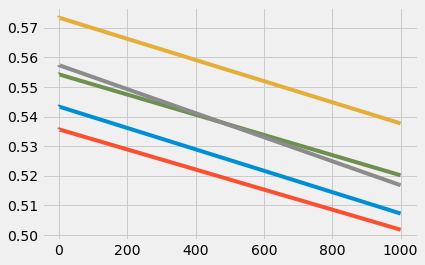

In [1440]:
plt.plot(np.logspace(-7, 3, 3), val_score)

In [1441]:
# find optimal alpha with grid search
param_grid = param_grid = param = {
    'alpha':[.00001, 0.0001,0.001, 0.01, 1, 10],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    }
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=folds, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best score:', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
modelr=grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best score: 0.5528954778416468
Best Params:  {'alpha': 0.0001, 'fit_intercept': True, 'normalize': True}


1.89237636538081
0.5459716695136348


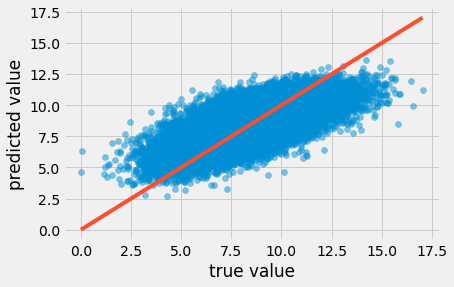

In [1442]:
y_predridgebis = modelr.predict(X_test)
print(mean_squared_error(y_test,y_predridgebis))
print(r2_score(y_test,y_predridgebis))
plt.scatter(y_test,y_predridgebis,alpha=0.5)
plt.xlabel("true value")
plt.ylabel("predicted value")
plt.plot([0,y_test.max()],[0,y_test.max()],color='C1')

#### Feature enginnering: polynomial feature

In [1443]:
from sklearn.preprocessing import PolynomialFeatures

In [1444]:
df_num=df_encode[['age_2020','Wage','WORKING_HOURS','X','Y','Lat','Long','INHABITANTS']]
df_num.head()

,age_2020,Wage,WORKING_HOURS,X,Y,Lat,Long,INHABITANTS
0,0.34375,0.890814,1.127144,0.774392,-0.444573,-0.432927,0.768805,0.066107
1,0.68750,0.000000,0.000000,0.774392,-0.444573,-0.432927,0.768805,0.066107
2,0.93750,0.000000,0.000000,0.774392,-0.444573,-0.432927,0.768805,0.066107
3,-0.93750,0.000000,0.000000,0.774392,-0.444573,-0.432927,0.768805,0.066107
4,-1.00000,0.000000,0.000000,0.774392,-0.444573,-0.432927,0.768805,0.066107


In [1445]:
df_num_test=df_encode_test[['age_2020','Wage','WORKING_HOURS','X','Y','Lat','Long','INHABITANTS']]
df_num_test.head()

,age_2020,Wage,WORKING_HOURS,X,Y,Lat,Long,INHABITANTS
0,1.43750,0.000000,NaN,0.77967,-0.45853,-0.44505,0.770973,0.063208
1,0.68750,0.000000,NaN,0.77967,-0.45853,-0.44505,0.770973,0.063208
2,-0.84375,0.327278,-3.237581,0.77967,-0.45853,-0.44505,0.770973,0.063208
3,-0.90625,0.000000,NaN,0.77967,-0.45853,-0.44505,0.770973,0.063208
4,0.46875,0.000000,NaN,0.77967,-0.45853,-0.44505,0.770973,0.063208


In [1446]:
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=2)


num = trans.fit_transform(df_num)
# convert the array back to a dataframe
df_num = pd.DataFrame(num)
# summarize
print(df_num.shape)

(50001, 45)


In [1448]:
h=['age_2020','Wage','WORKING_HOURS','X','Y','Lat','Long','INHABITANTS']
df_encode_poly=df_encode.copy(deep=True)
for i in range(len(h)):
    del df_encode_poly[h[i]]

In [1449]:
df_encode_poly=pd.concat([df_encode_poly,df_num],axis=1)

In [1450]:
y_poly = df_encode_poly['target']
X_poly = df_encode_poly.drop('target', axis=1)
X_train_poly,X_test_poly,y_train_poly,y_test_poly=train_test_split(X_poly, y_poly, train_size = 1/3, random_state=0)

In [1451]:
Ridge().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [1452]:
# find optimal alpha with grid search
param_grid = param = {
    'alpha':[0, 0.000001, .00001, 0.0001,0.001, 0.01, 1, 10],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    }
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', cv=folds, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_poly, y_train_poly)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Score:  0.5786655824059056
Best Params:  {'alpha': 0, 'fit_intercept': True, 'normalize': False}


In [1453]:
modelridge=grid.best_estimator_

1.7659910886215815
0.5776762198561668


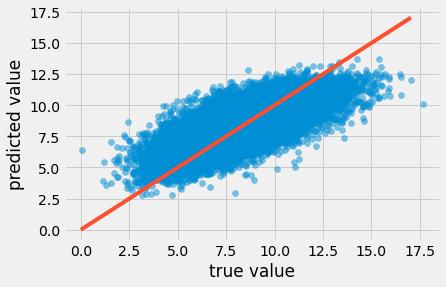

In [1454]:
y_predridgepoly = modelridge.predict(X_test_poly)
print(mean_squared_error(y_test_poly,y_predridgepoly))
print(r2_score(y_test_poly,y_predridgepoly))
plt.scatter(y_test_poly,y_predridgepoly,alpha=0.5)
plt.xlabel("true value")
plt.ylabel("predicted value")
plt.plot([0,y_test.max()],[0,y_test.max()],color='C1')

#### Create a pipeline

In [1455]:
from sklearn.pipeline import Pipeline


In [1456]:
model = RFE(estimator=Ridge())
pipeline = Pipeline(steps=[("rfe", model) ]
)

In [1457]:
param_grid = { 
    "rfe__step" : np.linspace(0.001, 1, 10),
    "rfe__estimator__alpha" : np.logspace(-3, 3, 7),
    "rfe__estimator__fit_intercept":[True,False],
    "rfe__estimator__normalize":[True,False],
}
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

grid_search = GridSearchCV(pipeline, param_grid,scoring='r2',cv=folds )
grid_search

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('rfe', RFE(estimator=Ridge()))]),
             param_grid={'rfe__estimator__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'rfe__estimator__fit_intercept': [True, False],
                         'rfe__estimator__normalize': [True, False],
                         'rfe__step': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ])},
             scoring='r2')

In [1458]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [1459]:
grid_search.fit(X_train_poly, y_train_poly)

print("Best params:")
print(grid_search.best_params_)

Best params:
{'rfe__estimator__alpha': 100.0, 'rfe__estimator__fit_intercept': True, 'rfe__estimator__normalize': False, 'rfe__step': 0.556}


In [1460]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.544


In [1461]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfe__estimator__alpha,param_rfe__estimator__fit_intercept,param_rfe__estimator__normalize,param_rfe__step,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
215,0.096341,0.005186,0.022142,0.000747,100.0,True,False,0.556,"{'rfe__estimator__alpha': 100.0, 'rfe__estimat...",0.535454,0.519502,0.558623,0.560281,0.546383,0.544048,0.015217,1
216,0.103922,0.010987,0.025333,0.002795,100.0,True,False,0.667,"{'rfe__estimator__alpha': 100.0, 'rfe__estimat...",0.535454,0.519502,0.558623,0.560281,0.546383,0.544048,0.015217,1
217,0.092952,0.004479,0.022739,0.003533,100.0,True,False,0.778,"{'rfe__estimator__alpha': 100.0, 'rfe__estimat...",0.535454,0.519502,0.558623,0.560281,0.546383,0.544048,0.015217,1
218,0.110105,0.018243,0.026330,0.003129,100.0,True,False,0.889,"{'rfe__estimator__alpha': 100.0, 'rfe__estimat...",0.535454,0.519502,0.558623,0.560281,0.546383,0.544048,0.015217,1
212,0.122872,0.003301,0.024933,0.004967,100.0,True,False,0.223,"{'rfe__estimator__alpha': 100.0, 'rfe__estimat...",0.534645,0.515407,0.552491,0.558793,0.546634,0.541594,0.015323,5


In [1462]:
print(
    (
        "best ridge regression from grid search: %.3f"
        % grid_search.score(X_test_poly, y_test_poly)
    )
)

best ridge regression from grid search: 0.541


In [1463]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
Pipeline(steps=[('rfe', RFE(estimator=Ridge(alpha=100.0), step=0.556))])


### iii. One generalised linear model: Lasso regression

In [1464]:
from sklearn.linear_model import Lasso# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)

In [1465]:
#the internal score
scores = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores.mean()


-4.160739968355399

In [1466]:
scores = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=5)
scores.mean()

0.008403329204832732

In [1467]:
y_predlasso = lasso.predict(X_test)

In [1468]:
print(mean_squared_error(y_test,y_predlasso))
print(r2_score(y_test,y_predlasso))

4.136576886244636
0.007531941347091786


In [1469]:
#is it du to alpha? probably
train_score,val_score=validation_curve(Lasso(),X_train, y_train, param_name='alpha', param_range= np.logspace(-7, 3, 3),cv=5)
val_score.mean()

C:\Users\Hannah\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12341.36115651161, tolerance: 5.579077031453229
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hannah\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12374.203177503317, tolerance: 5.613547596427958
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hannah\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12610.84694308412, tolerance: 5.604290489201322
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hannah\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

0.36651465180592463

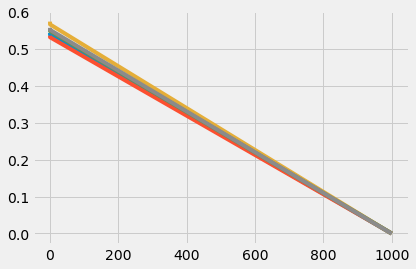

In [1470]:
plt.plot(np.logspace(-7, 3, 3), val_score)

In [1471]:
# find optimal alpha with grid search
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

param = {
    'alpha':[.00001, 0.0001,0.001, 0.01],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False],
    'selection':['cyclic','random'],
    }
grid = GridSearchCV(estimator=lasso, param_grid=param, scoring='r2', cv=folds, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.5528088582994862
Best Params:  {'alpha': 1e-05, 'fit_intercept': True, 'normalize': False, 'positive': False, 'selection': 'cyclic'}


C:\Users\Hannah\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15476.077941454158, tolerance: 6.994425970195327
  model = cd_fast.enet_coordinate_descent(


In [1472]:
model=grid.best_estimator_

1.8920620697721786
0.5460470768760796


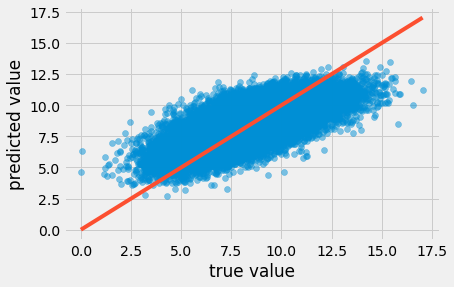

In [1473]:
y_lasso = model.predict(X_test)
print(mean_squared_error(y_test,y_lasso))
print(r2_score(y_test,y_lasso))
plt.scatter(y_test,y_lasso,alpha=0.5)
plt.xlabel("true value")
plt.ylabel("predicted value")
plt.plot([0,y_test.max()],[0,y_test.max()],color='C1')

#### Feature enginnering: polynomial feature

In [1474]:
Lasso().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [1475]:
# find optimal alpha with grid search
param = {
    'alpha':[ 0.0001,0.001, 0.01, 0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False],
    'selection':['cyclic','random']
    }
grid = GridSearchCV(estimator=Lasso(), param_grid=param, scoring='r2', cv=folds, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_poly, y_train_poly)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Score:  0.5738195236408478
Best Params:  {'alpha': 0.0001, 'fit_intercept': False, 'normalize': True, 'positive': False, 'selection': 'random'}


C:\Users\Hannah\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14735.432032608765, tolerance: 125.089929856806
  model = cd_fast.enet_coordinate_descent(


In [1476]:
lassopoly = Lasso(alpha= 0.0001, fit_intercept= True, normalize= False, positive= False, selection= 'cyclic').fit(X_train_poly, y_train_poly)

C:\Users\Hannah\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12789.627453208337, tolerance: 6.950004674466475
  model = cd_fast.enet_coordinate_descent(


In [1477]:
y_predlassopoly = lassopoly.predict(X_test_poly)

1.796970290775661
0.5702677715101659


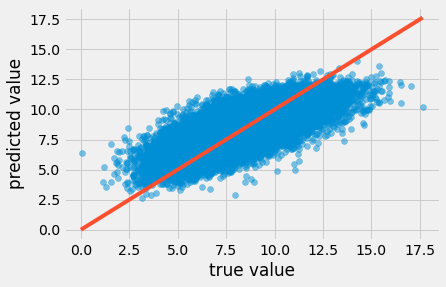

In [1478]:
#So we run with our best parameters
print(mean_squared_error(y_test_poly,y_predlassopoly))
print(r2_score(y_test_poly,y_predlassopoly))
plt.scatter(y_test_poly,y_predlassopoly,alpha=0.5)
plt.xlabel("true value")
plt.ylabel("predicted value")
plt.plot([0,y_test_poly.max()],[0,y_test_poly.max()],color='C1')

### Learning curve

This learning curve will tell us which size for the learning set is sufficient, to get the best results. This question is interesting, since data are expensive. We will know if it would be to get more data than in our sample.

In [1479]:
from sklearn.model_selection import learning_curve

In [1480]:
N, train_score, val_score=learning_curve(modelridge, X_train_poly, y_train_poly,
                                         train_sizes=np.linspace(0.1,1.0,10), cv=5)

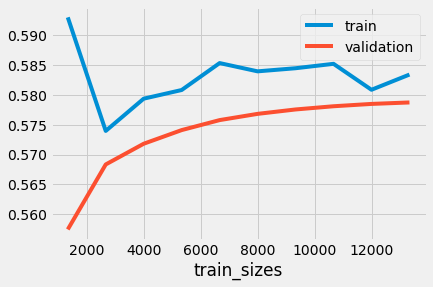

In [1481]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

## 2). The K-nearest neighbours regressor

### Identifying the best number of neighbours, with a simple model

In [1482]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
ks = np.arange(1,31,2)

In [1483]:
knn_cv = []
knn_train = []
for k in ks:
    knn_algo = KNeighborsRegressor(k)
    knn_cv.append(-cross_val_score(knn_algo, X_train, y_train, 
                                   cv=folds, scoring='neg_mean_squared_error'))
    knn_algo.fit(X_train, y_train)
    knn_train.append(mean_squared_error(y_train,knn_algo.predict(X_train)))

best k: 25 with mean squared error 3.9837538417669784


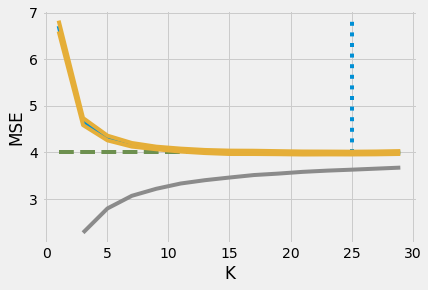

In [1484]:
import math
knn_mse = np.array([x.mean() for x in knn_cv])
knn_mse_std = np.array([x.std() for x in knn_cv])/math.sqrt(5)
best_acc_pos = knn_mse.argmin()
best_k = ks[best_acc_pos]
plt.plot(ks,knn_mse)
plt.plot(ks,knn_mse+knn_mse_std,'C2')
plt.plot(ks,knn_mse-knn_mse_std,'C2')
plt.plot(ks[1:],knn_train[1:],'C4')
plt.vlines(best_k,min(knn_mse),max(knn_mse+knn_mse_std),
          linestyles='dotted')
plt.hlines(knn_mse[best_acc_pos]+knn_mse_std[best_acc_pos],min(ks),max(ks),
          colors='C3',linestyles='dashed')
plt.xlabel("K")
plt.ylabel("MSE")
print('best k:',best_k,'with mean squared error',knn_mse[best_acc_pos])

In [1485]:
knr = KNeighborsRegressor(best_k)
knr.fit(X_train,y_train)
y_test_knn_pred = knr.predict(X_test)
print(mean_squared_error(y_test,y_test_knn_pred))
print(r2_score(y_test,y_test_knn_pred))

3.9490972805113405
0.05251297891897089


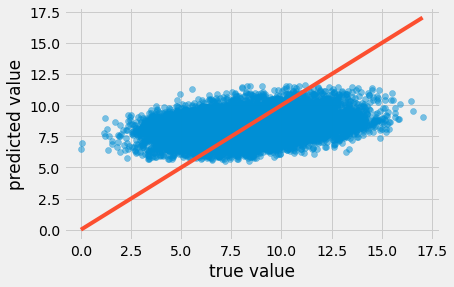

In [1486]:
plt.scatter(y_test,y_test_knn_pred,alpha=0.5)
plt.xlabel("true value")
plt.ylabel("predicted value")
plt.plot([0,y_test.max()],[0,y_test.max()],color='C1')

#### KNN with feature enginnering: polynomial features

In [1487]:

knn_cv_poly = []
knn_train_poly = []
for k in ks:
    knn_algo = KNeighborsRegressor(k)
    knn_cv_poly.append(-cross_val_score(knn_algo, X_train_poly, y_train_poly, 
                                   cv=5, scoring='neg_mean_squared_error'))
    knn_algo.fit(X_train_poly, y_train_poly)
    knn_train_poly.append(mean_squared_error(y_train_poly,knn_algo.predict(X_train_poly)))

best k: 19 with mean squared error 3.9407245247503164


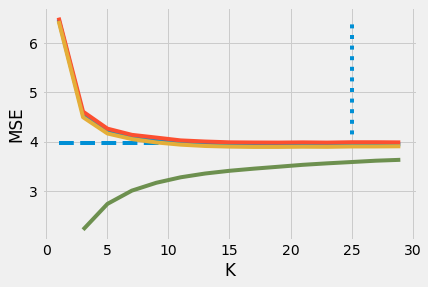

In [1488]:
ks_poly = np.arange(1,30,2)
import math
knn_mse_poly = np.array([x.mean() for x in knn_cv_poly])
knn_mse_std_poly = np.array([x.std() for x in knn_cv_poly])/math.sqrt(5)
best_acc_pos_poly = knn_mse_poly.argmin()
best_k_poly = ks[best_acc_pos_poly]
plt.plot(ks_poly,knn_mse_poly)
plt.plot(ks_poly,knn_mse_poly+knn_mse_std_poly)
plt.plot(ks_poly,knn_mse_poly-knn_mse_std_poly)
plt.plot(ks[1:],knn_train_poly[1:])
plt.vlines(best_k,min(knn_mse_poly),max(knn_mse_poly+knn_mse_std_poly),
          linestyles='dotted')
plt.hlines(knn_mse_poly[best_acc_pos_poly]+knn_mse_std_poly[best_acc_pos_poly],min(ks_poly),max(ks_poly),linestyles='dashed')
plt.xlabel("K")
plt.ylabel("MSE")
print('best k:',best_k_poly,'with mean squared error',knn_mse_poly[best_acc_pos_poly])

In [1489]:
knr = KNeighborsRegressor(best_k_poly)
knr.fit(X_train_poly,y_train_poly)
y_test_knn_pred_poly = knr.predict(X_test_poly)
print(mean_squared_error(y_test_poly,y_test_knn_pred_poly))
print(r2_score(y_test_poly,y_test_knn_pred_poly))

3.94936052162795
0.05553947843157092


In [1490]:
knr = KNeighborsRegressor(best_k_poly)
knr.fit(X_train_poly,y_train_poly)
y_test_knn_pred_poly = knr.predict(X_test_poly)
print(mean_squared_error(y_test_poly,y_test_knn_pred_poly))
print(r2_score(y_test_poly,y_test_knn_pred_poly))

3.94936052162795
0.05553947843157092


## 2) Decision tree

In [1491]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [1492]:
h=['X','Y','Lat','Long']
for i in range(len(h)):
    del(df_encode[h[i]])
    del(df_encode_test[h[i]])

In [1493]:
df_encode

,occupation_42,highest_degree,Household,SEX,IS_STUDENT,Act,target,Work_condition,JOB_CATEGORY,ACTIVITY_SECTOR,...,EMP,toc,wage,club,csp_n1,job_localisation_departement,age_2020,Wage,WORKING_HOURS,INHABITANTS
0,29,1,5,0,False,0,9.6545,3,2,25,...,True,True,True,True,15,1,0.34375,0.890814,1.127144,0.066107
1,8,7,8,1,False,5,8.4466,6,3,37,...,False,False,False,True,18,0,0.68750,0.000000,0.000000,0.066107
2,8,10,0,1,False,5,6.5772,6,3,37,...,False,False,False,False,18,0,0.93750,0.000000,0.000000,0.066107
3,18,2,5,0,True,3,11.2192,6,3,37,...,False,False,False,False,18,0,-0.93750,0.000000,0.000000,0.066107
4,30,1,5,0,True,1,5.5074,6,3,37,...,False,False,False,False,18,0,-1.00000,0.000000,0.000000,0.066107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,20,6,1,0,False,0,10.2332,3,2,6,...,True,True,True,False,0,2,-0.37500,1.054335,1.199290,0.335288
49997,9,2,5,1,False,0,7.0050,6,3,37,...,True,False,False,False,18,0,-0.56250,0.000000,0.000000,0.335288
49998,19,7,5,1,False,0,5.0973,3,2,2,...,True,True,True,False,4,1,-0.34375,1.533059,1.203430,0.335288
49999,22,2,7,1,False,2,6.2408,6,3,37,...,False,False,False,False,18,0,0.18750,0.000000,0.000000,0.335288


In [1494]:
df_encode_test

,occupation_42,highest_degree,Household,SEX,IS_STUDENT,Act,Work_condition,JOB_CATEGORY,ACTIVITY_SECTOR,Employee_count,...,City_type,Nom du département,Nom de la région,club,csp_n1,job_localisation_departement,age_2020,Wage,WORKING_HOURS,INHABITANTS
0,7,11,5,0,False,5,6,3,37,7,...,1,0,0,False,18,0,1.43750,0.000000,NaN,0.063208
1,16,7,7,0,False,0,6,3,37,7,...,1,0,0,False,18,0,0.68750,0.000000,NaN,0.063208
2,20,7,4,1,False,0,3,2,7,5,...,1,0,0,False,0,1,-0.84375,0.327278,-3.237581,0.063208
3,29,7,7,1,False,2,6,3,37,7,...,1,0,0,True,18,0,-0.90625,0.000000,NaN,0.063208
4,6,7,8,1,False,5,6,3,37,7,...,1,0,0,False,18,0,0.46875,0.000000,NaN,0.063208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,13,0,6,1,False,0,6,3,37,7,...,1,87,12,False,18,0,0.59375,0.000000,NaN,0.348404
49995,37,5,8,1,False,2,6,3,37,7,...,1,87,12,False,18,0,0.12500,0.000000,NaN,0.348404
49996,18,1,5,1,True,3,6,3,37,7,...,1,87,12,False,18,0,-1.00000,0.000000,NaN,0.348404
49997,29,10,4,0,False,0,4,1,17,6,...,1,87,12,False,4,2,-0.28125,0.467275,-1.969762,0.348404


In [1495]:
df_encode=df_encode.join(pd.get_dummies(df_encode['IS_STUDENT'],prefix='IS_STUDENT'), how = 'left',lsuffix = '', rsuffix = 'False')

df_encode=df_encode.join(pd.get_dummies(df_encode['club'],prefix='club'),how = 'left',lsuffix = '', rsuffix = 'False')
df_encode_test=df_encode_test.join(pd.get_dummies(df_encode_test['IS_STUDENT'],prefix='IS_STUDENT'),how = 'left',lsuffix = '', rsuffix = 'False')

df_encode_test=df_encode_test.join(pd.get_dummies(df_encode_test['club'],prefix='club'),how = 'left',lsuffix = '', rsuffix = 'False')

In [1496]:
h=['IS_STUDENT','IS_STUDENT_False','club_False']
for i in range(len(h)):
    del(df_encode[h[i]])
    del(df_encode_test[h[i]])

In [1498]:
encode_Y = df_encode['target']
encode_X = df_encode.drop('target',axis=1)

In [1499]:
encode_X_train, encode_X_test, encode_Y_train, encode_Y_test = train_test_split(encode_X, 
                                                                encode_Y, 
                                                                test_size=0.3, 
                                                                random_state=0)

In [1500]:
dt = DecisionTreeRegressor()
dt.fit(encode_X_train,encode_Y_train)
encode_test_pred = dt.predict(encode_X_test)
print(mean_squared_error(encode_Y_test, encode_test_pred))

2.0588873876264913


<AxesSubplot:xlabel='min_split', ylabel='value'>

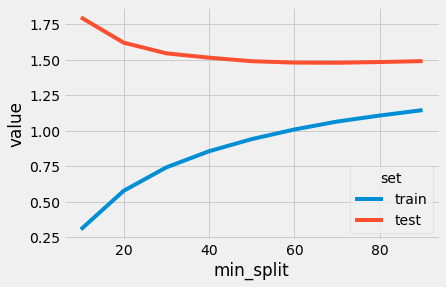

In [1501]:
min_splits = range(10,100,10) 
train_mse = []
test_mse = []
for m in min_splits:
    dt = DecisionTreeRegressor(min_samples_split=m)
    dt.fit(encode_X_train,encode_Y_train)
    train_mse.append(mean_squared_error(encode_Y_train, dt.predict(encode_X_train)))
    test_mse.append(mean_squared_error(encode_Y_test, dt.predict(encode_X_test)))                     

min_split_result = pd.DataFrame({'min_split': min_splits, 
                                  'train': train_mse,
                                  'test':test_mse  })
sns.lineplot(data=min_split_result.melt('min_split', var_name='set'),
             x='min_split', y='value', hue='set')

<AxesSubplot:xlabel='max_depth', ylabel='value'>

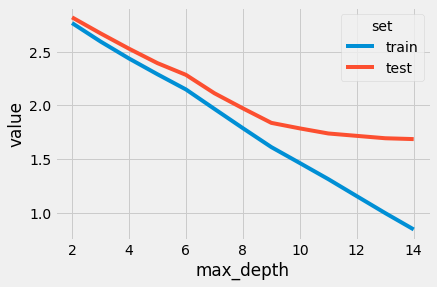

In [1502]:
max_depths = range(2, 15) 
train_mse = []
test_mse = []
for d in max_depths:
    dt = DecisionTreeRegressor(max_depth=d)
    dt.fit(encode_X_train,encode_Y_train)
    train_mse.append(mean_squared_error(encode_Y_train, dt.predict(encode_X_train)))
    test_mse.append(mean_squared_error(encode_Y_test, dt.predict(encode_X_test)))                     

max_depth_result = pd.DataFrame({'max_depth': max_depths, 
                                  'train': train_mse,
                                  'test':test_mse  })
sns.lineplot(data=max_depth_result.melt('max_depth', var_name='set'),
             x='max_depth', y='value', hue='set')

In [1503]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
cv_folds = KFold(5, shuffle=True, random_state=0)
dtl=DecisionTreeClassifier(max_depth=14,min_samples_split=60,random_state=0)
value1=cross_val_score(dtl, encode_X_train, encode_Y_train.astype('int'),scoring='neg_mean_squared_error',cv=cv_folds)
print(value1.mean())

-1.9556857142857145


In [1504]:
rfc= RandomForestRegressor()
rfc=rfc.fit(encode_X_train,encode_Y_train)
result=rfc.score(encode_X_test, encode_Y_test)
result

0.7654106830589475

In [1505]:
print('All trees we get:%s' %rfc.estimators_)

All trees we get:[DecisionTreeRegressor(max_features='auto', random_state=1658895346), DecisionTreeRegressor(max_features='auto', random_state=680870201), DecisionTreeRegressor(max_features='auto', random_state=1037200821), DecisionTreeRegressor(max_features='auto', random_state=1385151418), DecisionTreeRegressor(max_features='auto', random_state=1886214415), DecisionTreeRegressor(max_features='auto', random_state=648288580), DecisionTreeRegressor(max_features='auto', random_state=1865437481), DecisionTreeRegressor(max_features='auto', random_state=1585721793), DecisionTreeRegressor(max_features='auto', random_state=420026076), DecisionTreeRegressor(max_features='auto', random_state=927520401), DecisionTreeRegressor(max_features='auto', random_state=1944905750), DecisionTreeRegressor(max_features='auto', random_state=1374284771), DecisionTreeRegressor(max_features='auto', random_state=1129044971), DecisionTreeRegressor(max_features='auto', random_state=234265176), DecisionTreeRegressor

In [1506]:
rfc.predict(encode_X_test)
print('The predicted results we get:%s' %rfc.predict(encode_X_test))

The predicted results we get:[9.578804 7.847973 6.86562  ... 9.611293 8.685697 8.878704]


In [1507]:
rfc.feature_importances_
print('The weightings of each variable we get:%s' %rfc.feature_importances_)

The weightings of each variable we get:[6.56172983e-02 8.97154122e-02 4.30151446e-02 2.88461586e-01
 2.98029940e-02 4.21865047e-03 2.01351504e-03 1.48763587e-02
 1.20571018e-02 2.16918632e-02 1.09594212e-02 9.06453023e-03
 3.35809254e-02 6.01638997e-02 5.28491471e-02 5.13248196e-02
 6.98710695e-03 1.99758420e-04 2.04941818e-04 1.24593271e-02
 2.23500844e-03 7.33945614e-02 4.44158985e-02 1.73400836e-02
 4.01361959e-02 1.00685941e-02 3.14585644e-03]


In [1508]:
importances=rfc.feature_importances_
np.argsort(importances)[::-1]

array([ 3,  1, 21,  0, 13, 14, 15, 22,  2, 24, 12,  4,  9, 23,  7, 19,  8,
       10, 25, 11, 16,  5, 26, 20,  6, 18, 17], dtype=int64)

Variables ranking
 1) SEX                            0.288462
 2) highest_degree                 0.089715
 3) age_2020                       0.073395
 4) occupation_42                  0.065617
 5) City_type                      0.060164
 6) Nom du département             0.052849
 7) Nom de la région               0.051325
 8) Wage                           0.044416
 9) Household                      0.043015
10) INHABITANTS                    0.040136
11) Nom de la commune              0.033581
12) Act                            0.029803
13) type_of_contract               0.021692
14) WORKING_HOURS                  0.017340
15) ACTIVITY_SECTOR                0.014876
16) csp_n1                         0.012459
17) Employee_count                 0.012057
18) Employer_category              0.010959
19) IS_STUDENT_True                0.010069
20) EMP_CONTRACT                   0.009065
21) EMP                            0.006987
22) Work_condition                 0.004219
23) club_True 

<function matplotlib.pyplot.show(close=None, block=None)>

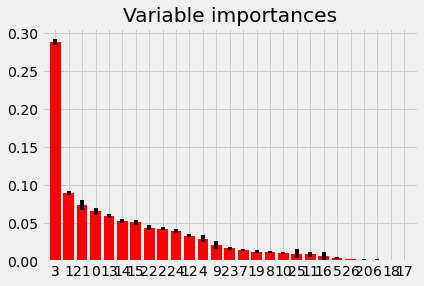

In [1509]:
std=np.std([z.feature_importances_ for z in rfc.estimators_],axis=0)
indices=np.argsort(importances)[::-1]
print('Variables ranking')
for f in range(encode_X_test.shape[1]):
    print('%2d) %-*s %f' % (f + 1,30,encode_X_test.columns[indices[f]],importances[indices[f]] ))
plt.figure()
plt.title('Variable importances')
plt.bar(range(encode_X_test.shape[1]),importances[indices],color='r',yerr=std[indices], align='center')
plt.xticks(range(encode_X_test.shape[1]),indices)
plt.xlim([-1,encode_X_test.shape[1]])
plt.show

In [1510]:
h=['club_True','job_localisation_departement']
for i in range(len(h)):
    del(df_encode[h[i]])
    del(df_encode_test[h[i]])

In [1511]:
h=['club_True','job_localisation_departement']
for i in range(len(h)):
    del(encode_X_train[h[i]])
    del(encode_X_test[h[i]])

In [1512]:
h=['JOB_CATEGORY']
for i in range(len(h)):
    del(df_encode[h[i]])
    del(df_encode_test[h[i]])

In [1513]:
h=['JOB_CATEGORY']
for i in range(len(h)):
    del(encode_X_train[h[i]])
    del(encode_X_test[h[i]])

In [1514]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [1515]:
cv_folds = KFold(5, shuffle=True, random_state=0)
dt2=RandomForestClassifier(n_estimators=10,max_depth=None,min_samples_split=2,random_state=0)
value2=cross_val_score(dt2, encode_X_train, encode_Y_train.astype('int'),cv=cv_folds)
dt2.fit(encode_X_train,encode_Y_train.astype('int'))
encode_Y_pred1 = list(dt2.predict(encode_X_test))
mse1=mean_squared_error(encode_Y_test, encode_Y_pred1)
r2_1=r2_score(encode_Y_test,encode_Y_pred1)
print(mse1)
print(r2_1)
print(value2.mean())

2.4783349919332043
0.40912662419110235
0.3426


In [1516]:
dt_params = {'n_estimators': range(25, 500,25)}
cv_folds = KFold(5, shuffle=True, random_state=0)
dt_cv = GridSearchCV(estimator=RandomForestClassifier(min_samples_split=100,
                                                      min_samples_leaf=20,
                                                      max_depth=3,random_state=10),
                     param_grid=dt_params,
                     scoring='neg_mean_squared_error',
                     cv=cv_folds)
dt_cv.fit(encode_X_train,encode_Y_train.astype('int'))
para1=dt_cv.best_params_['n_estimators']
print(dt_cv.best_params_['n_estimators'])

225


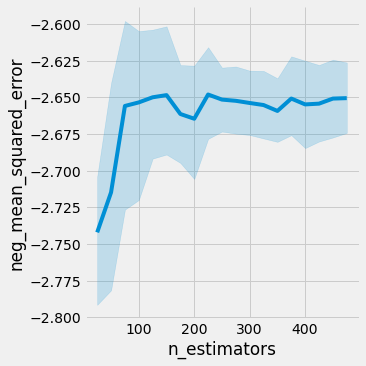

In [1517]:
results = pd.DataFrame(dt_params)
for k in range(5):
    results = pd.concat([results,
                         pd.DataFrame(dt_cv.cv_results_['split'+str(k)+'_test_score'])],
                        axis=1)
        
import seaborn as sns
sns.relplot(data=results.melt('n_estimators',value_name='neg_mean_squared_error'),
            x='n_estimators',y='neg_mean_squared_error',kind='line')


In [1518]:
encode_Y_pred2= list(dt_cv.predict(encode_X_test))
mse2=mean_squared_error(encode_Y_test, encode_Y_pred2)
r2_2=r2_score(encode_Y_test,encode_Y_pred2)
print(mse2)
print(r2_2)
print(dt_cv.best_score_)

2.8699339786674223
0.3157633718430004
-2.648


In [1519]:
dt_params2 = {'min_samples_split': range(60,200,20)}
cv_folds = KFold(5, shuffle=True, random_state=0)
dt_cv2 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=para1,min_samples_leaf=30,
                                                       max_depth=3,random_state=10),
                     param_grid=dt_params2,
                     scoring='neg_mean_squared_error',
                     cv=cv_folds)
dt_cv2.fit(encode_X_train,encode_Y_train.astype('int'))
para2=dt_cv2.best_params_['min_samples_split']
print(dt_cv2.best_params_['min_samples_split'])

80


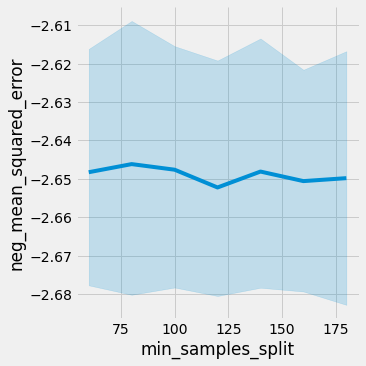

In [1520]:
results2 = pd.DataFrame(dt_params2)
for k in range(5):
    results2 = pd.concat([results2,
                         pd.DataFrame(dt_cv2.cv_results_['split'+str(k)+'_test_score'])],
                        axis=1)
        
import seaborn as sns
sns.relplot(data=results2.melt('min_samples_split',value_name='neg_mean_squared_error'),
            x='min_samples_split',y='neg_mean_squared_error',kind='line')


In [1521]:
encode_Y_pred3= list(dt_cv2.predict(encode_X_test))
mse3=mean_squared_error(encode_Y_test, encode_Y_pred3)
r2_3=r2_score(encode_Y_test,encode_Y_pred3)
print(mse3)
print(r2_3)
print(dt_cv2.best_score_)

2.872457450435971
0.3151617371618559
-2.646171428571429


In [1522]:
dt_params3 = {'min_samples_leaf':range(10,110,10)}
cv_folds = KFold(5, shuffle=True, random_state=0)
dt_cv3 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=para1,min_samples_split=para2,
                                                       max_depth=3,random_state=10),
                     param_grid=dt_params3,
                     scoring='neg_mean_squared_error',
                     cv=cv_folds)
dt_cv3.fit(encode_X_train,encode_Y_train.astype('int'))
para3=dt_cv3.best_params_['min_samples_leaf']
print(dt_cv3.best_params_['min_samples_leaf'])

20


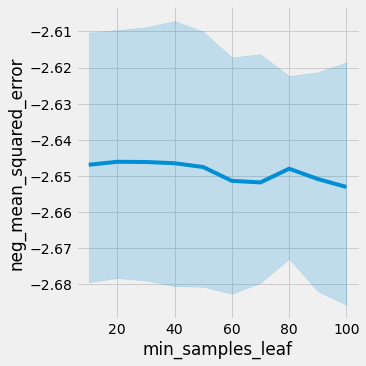

In [1523]:
results3 = pd.DataFrame(dt_params3)
for k in range(5):
    results3 = pd.concat([results3,
                         pd.DataFrame(dt_cv3.cv_results_['split'+str(k)+'_test_score'])],
                        axis=1)
        
import seaborn as sns
sns.relplot(data=results3.melt('min_samples_leaf',value_name='neg_mean_squared_error'),
            x='min_samples_leaf',y='neg_mean_squared_error',kind='line')

In [1524]:
encode_Y_pred4= list(dt_cv3.predict(encode_X_test))
mse4=mean_squared_error(encode_Y_test, encode_Y_pred4)
r2_4=r2_score(encode_Y_test,encode_Y_pred4)
print(mse4)
print(r2_4)
print(dt_cv3.best_score_)

2.8714734227044865
0.31539634458558363
-2.646114285714286


In [1525]:
dt_params4 = {'max_depth': range(3,30,2)}
cv_folds = KFold(5, shuffle=True, random_state=0)
dt_cv4 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=para1,
                                                       min_samples_split=para2,
                                                       min_samples_leaf=para3,
                                                       random_state=10),
                     param_grid=dt_params4,
                     scoring='neg_mean_squared_error',
                     cv=cv_folds)
dt_cv4.fit(encode_X_train,encode_Y_train.astype('int'))
para4=dt_cv4.best_params_['max_depth']
print(dt_cv4.best_params_['max_depth'])
print(dt_cv4.best_score_)

21
-1.7099428571428572


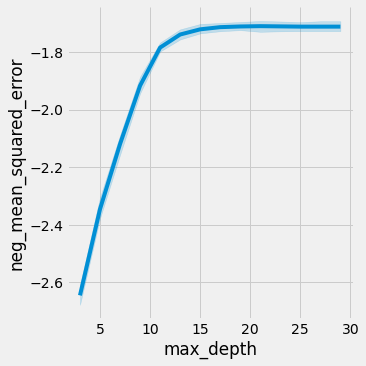

In [1526]:
results = pd.DataFrame(dt_params4)
for k in range(5):
    results = pd.concat([results,
                         pd.DataFrame(dt_cv4.cv_results_['split'+str(k)+'_test_score'])],
                        axis=1)
        
import seaborn as sns
sns.relplot(data=results.melt('max_depth',value_name='neg_mean_squared_error'),
            x='max_depth',y='neg_mean_squared_error',kind='line')


In [1527]:
encode_Y_pred5= list(dt_cv4.predict(encode_X_test))
mse5=mean_squared_error(encode_Y_test, encode_Y_pred5)
r2_5=r2_score(encode_Y_test,encode_Y_pred5)
print(mse5)
print(r2_5)
print(dt_cv4.best_score_)

1.9132101069255383
0.5438611333050722
-1.7099428571428572


# Conclusion: Prediction of the results

Now we try to use our model to predict the results

In [1528]:
dt_cv5 = RandomForestClassifier(n_estimators=para1, max_depth=para2, min_samples_split=para3, min_samples_leaf=para4, random_state=0)
dt_cv5.fit(encode_X_train,encode_Y_train.astype('int'))
encode_Y_pred = dt_cv5.predict(encode_X_test)


In [1529]:
value_final=cross_val_score(dt_cv5, encode_X_train, encode_Y_train.astype('int'),scoring='neg_mean_squared_error',cv=cv_folds)
print(value1.mean())

-1.9556857142857145


In [1530]:
df_encode_test.columns

Index(['occupation_42', 'highest_degree', 'Household', 'SEX', 'Act',
       'Work_condition', 'ACTIVITY_SECTOR', 'Employee_count',
       'type_of_contract', 'Employer_category', 'EMP_CONTRACT',
       'Nom de la commune', 'City_type', 'Nom du département',
       'Nom de la région', 'csp_n1', 'age_2020', 'Wage', 'WORKING_HOURS',
       'INHABITANTS', 'IS_STUDENT_True'],
      dtype='object')

In [ ]:
encode_Y_pred = pd.DataFrame(dt_cv5.predict(df_encode_test))

In [ ]:
df_test1=pd.read_csv('test_dataset.csv', sep=',')
predict=pd.merge(df_test1['Unique_id'], encode_Y_pred,left_index=True, right_index=True)
predict.rename(columns={0:'target'},inplace=True)
predict.to_csv("predictions.csv")